In [68]:
import glob
import astropy
import importlib
import math
import numpy as np
import xlwt
import xlsxwriter
import warnings
warnings.filterwarnings('ignore')

from xlwt import Workbook
from reduct_funcs import funcs_calib_and_plot
from reduct_funcs import funcs_star_finder
from reduct_funcs import funcs_apt_phot
from reduct_funcs import funcs_utils
from reduct_funcs import funcs_polarimetry

importlib.reload(funcs_calib_and_plot)
importlib.reload(funcs_star_finder)
importlib.reload(funcs_apt_phot)
importlib.reload(funcs_utils)
importlib.reload(funcs_polarimetry)

<module 'reduct_funcs.funcs_polarimetry' from 'C:\\Users\\afiq-Astro\\Desktop\\TSSP\\reductions_4\\reduct_funcs\\funcs_polarimetry.py'>

In [5]:
#fp = 'C:/Users/afiq-Astro/Desktop/TSSP/reductions_4/files_sorted/2020-04-22'
#funcs_utils.make_dir(fp )

#2020-03-05
#2020-03-14 #The one with the reported flaw. If it looks faulty. Flip it. Simple adjustment
#2020-03-14

In [46]:
#Takes into consideration the pol flat
MJD = '2020-04-23'
pol_flat_MJD = 'moaf' #26 was the first flat thing
p_3 = 'P3-R'
p_1 = 'P1-R'
target_name='EE_Cep'

bias = glob.glob('./files_sorted/'+MJD+'/bias/*')
dark = glob.glob('./files_sorted/'+MJD+'/dark/*')
p_1_pol_std_flat = glob.glob('./files_sorted/pol_flats/'+pol_flat_MJD+'/'+p_1 +'/*')
p_3_pol_std_flat = glob.glob('./files_sorted/pol_flats/'+pol_flat_MJD+'/'+p_3 +'/*')

target = glob.glob('./files_sorted/'+MJD+'/'+target_name+'/*')
pol_std = glob.glob('./files_sorted/'+MJD+'/pol_std/*')

print("MJD:", MJD,
      "Bias:", str(len(bias))+".", 
      "Dark:", str(len(dark))+".", 
      "p_1 Flat:", str(len(p_1_pol_std_flat))+".",
      "p_3 Flat:", str(len(p_3_pol_std_flat))+".", 
      "Target:", str(len(target))+".", 
      "Polarization Standard:", str(len(pol_std))+".")

funcs_calib_and_plot.file_splits(bias)
funcs_calib_and_plot.file_splits(dark)
funcs_calib_and_plot.file_splits(p_1_pol_std_flat)
funcs_calib_and_plot.file_splits(p_3_pol_std_flat)
funcs_calib_and_plot.file_splits(target)
funcs_calib_and_plot.file_splits(pol_std)

MJD: 2020-04-23 Bias: 50. Dark: 472. p_1 Flat: 121. p_3 Flat: 79. Target: 410. Polarization Standard: 249.
zero {'bias'} Filters: [('N-B', 50)] 
dark {'dark'} Filters: [('N-B', 472)] 
flat {'flat'} Filters: [('P1-R', 121)] 
flat {'flat'} Filters: [('P3-R', 79)] 
object {'eecep'} Filters: [('P3-R', 45), ('N-V', 80), ('N-R', 80), ('N-B', 80), ('P1-R', 45), ('N-I', 80)] total 54.0 min exposure time
object {'hd212311', 'bd64106', 'oj287', 'hd215806'} Filters: [('P3-R', 100), ('N-V', 11), ('P1-R', 100), ('N-B', 11), ('N-R', 16), ('N-I', 11)] total 134.0 min exposure time


In [8]:
#m_biast, m_dark, m_flat = funcs_calib_and_plot.make_calib_files(bias, dark, pol_std_flat)
m_biast, m_dark, p_1_m_flat = funcs_calib_and_plot.make_calib_files(bias, dark, p_1_pol_std_flat)
m_biast, m_dark, p_3_m_flat = funcs_calib_and_plot.make_calib_files(bias, dark, p_3_pol_std_flat)
#m_biast, m_dark, m_flat = funcs_calib_and_plot.make_calib_files(bias, dark, flat)
#Where do the R bands start? #That is not even a relevant question bro
#each has a pair yeah. but what if some was extra?

In [47]:
funcs_polarimetry.check_pol_std()
funcs_utils.print_list(MJD,  pol_std)

High Pol standard: ['BDp64106', 'BDp59389', 'HD19820', 'HD25443', 'HD215806', 'BDp25727', 'HD251204', 'HD160529', 'HD161056', 'Hiltner960', 'VICyg12', 'HD204827'] 

Low Pol standard: ['HD12021', 'HD14069', 'HD21447', 'G191B2B', 'HD64299', 'HD94851', 'GD319', 'BDp33_2642', 'HD154892', 'BDp32_3739', 'BDp28_4211', 'HD212311'] 

2020-04-23
0 00:46:15.55 P1-R 10.0 bd64106
1 00:46:46.96 P1-R 10.0 bd64106
2 00:47:18.37 P1-R 10.0 bd64106
3 00:47:49.81 P1-R 10.0 bd64106
4 00:48:21.24 P1-R 10.0 bd64106
5 00:48:52.67 P1-R 10.0 bd64106
6 00:49:24.15 P1-R 10.0 bd64106
7 00:49:55.57 P1-R 10.0 bd64106
8 00:50:27.01 P1-R 10.0 bd64106
9 00:50:58.45 P1-R 10.0 bd64106
10 00:51:29.92 P1-R 10.0 bd64106
11 00:52:01.35 P1-R 10.0 bd64106
12 00:53:27.17 P1-R 10.0 bd64106
13 00:53:58.65 P1-R 10.0 bd64106
14 00:54:30.09 P1-R 10.0 bd64106
15 00:55:01.47 P1-R 10.0 bd64106
16 00:55:32.90 P1-R 10.0 bd64106
17 00:56:04.33 P1-R 10.0 bd64106
18 00:56:35.76 P1-R 10.0 bd64106
19 00:57:07.19 P1-R 10.0 bd64106
20 00:57:38.

241 22:10:41.46 P3-R 120.0 oj287
242 22:14:53.49 P3-R 120.0 oj287
243 22:19:05.53 P3-R 120.0 oj287
244 22:23:17.57 P3-R 120.0 oj287
245 22:27:29.58 P3-R 120.0 oj287
246 22:31:41.61 P3-R 120.0 oj287
247 22:35:53.62 P3-R 120.0 oj287
248 22:40:05.64 P3-R 120.0 oj287


In [10]:
#we saw that P3 clearly has a split sources that we agree on
#I'm trying to decide for this G19B2B. Who is the the cluster.
#There is no way that my current algorithm can handle the spatial distribution of the polarization standard file 
#We need to 

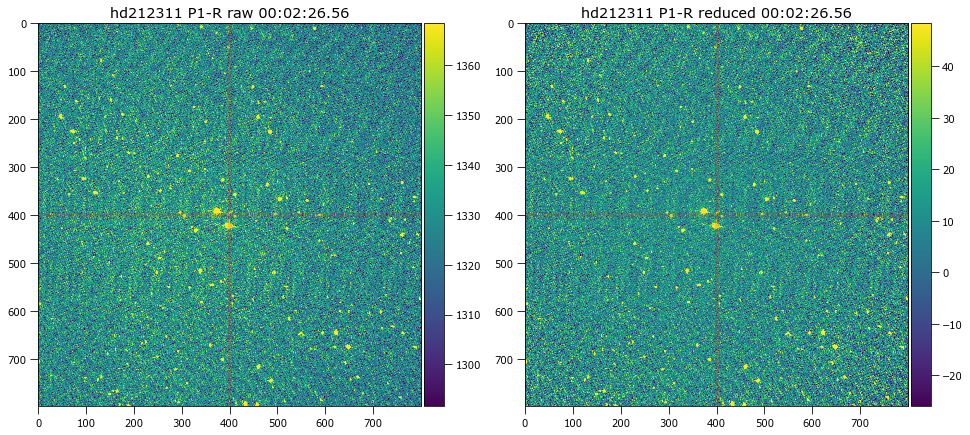

<Figure size 1008x1008 with 0 Axes>

In [64]:
k = 68
reduced_obj = funcs_calib_and_plot.plot_double_raw_v_reduced(astropy.io.fits.open(pol_std[k]),
                                    [512, 512, 400, 400], 
                                    (m_biast, m_dark, p_1_m_flat), 
                                    True, True, True)

124 peaks detected from image of size 1024 x 1024 with sigma: 4 and second threshold: 761.5637364621856
Targets within region of interest:  2


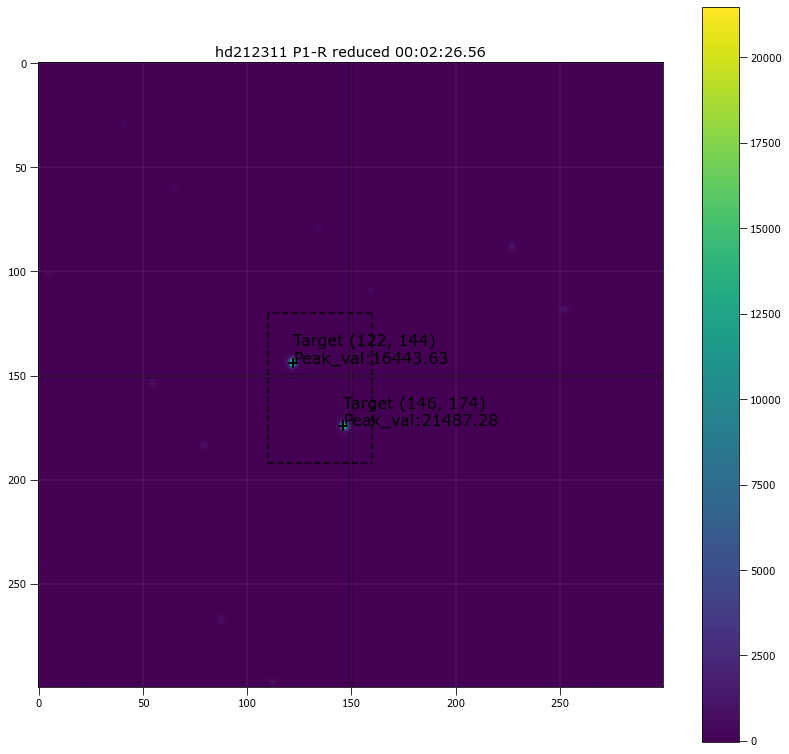

Aperture positions are: [(484, 506), (508, 536)] from the 1024 x 1024 image
Aperture positions are: [(122, 144), (146, 174)] from the 150 x 150 image


In [66]:
search_off = 150
search_bracket = [30, 42, 40, 10]
x_targ, y_targ, peak_targ  = funcs_polarimetry.source_peak_finder_pol_std(reduced_obj,4,search_bracket, 600 , False, True) #what do I return from this?
apt_pos = funcs_star_finder.plot_spotted(reduced_obj, search_off, search_bracket,x_targ, y_targ, peak_targ, True, False)

apt_positions = []
for h in range(0 , len(x_targ)):
    apt_positions.append((x_targ[h], y_targ[h])) #This must undergo some translation    
    
print("Aperture positions are:", apt_positions, "from the", reduced_obj[0].header['NAXIS1'], "x", reduced_obj[0].header['NAXIS2'], "image")
print("Aperture positions are:", apt_pos, "from the", str(search_off), "x", str(search_off) ,"image")

In [8]:
#PIPE!

P1-R Filter


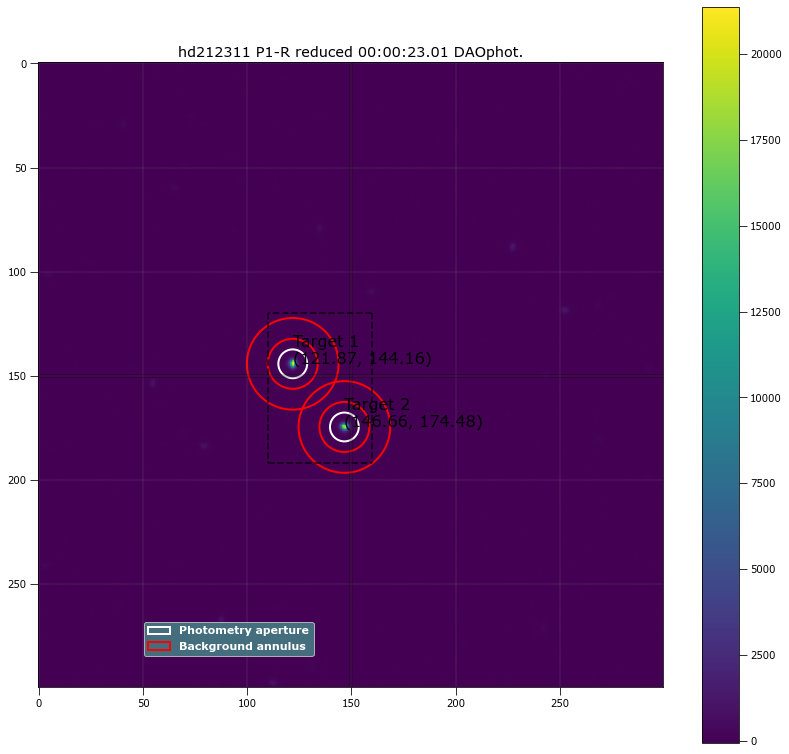

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 121.87223 144.15624 ...           4485.239      14552.863           57.11119
  2 146.66069 174.47863 ...          4392.5025      14452.663          56.319548

 Aperture are: 150.37324487896544 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 121.87223 144.15624 ...                 4477.1989             189086.56
  2 146.66069 174.47863 ...                 4384.5738             190743.24

Write this out the excel
60 00:00:23.01 P1-R 2.0 6.918474576271186 121.87222774122004 144.1562422023179 189086.55543466803 4477.198856125372 146

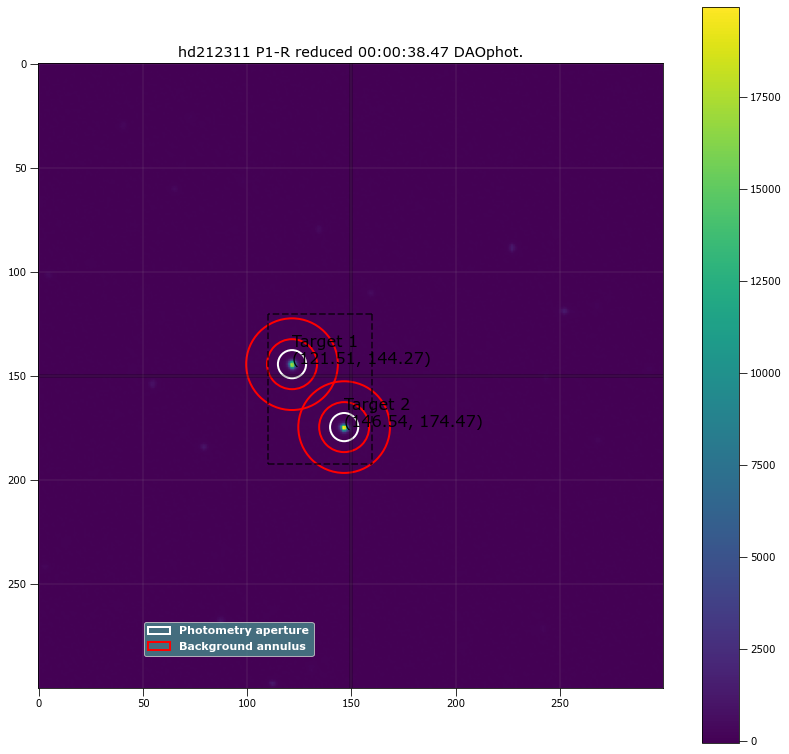

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 121.51157 144.26877 ...          4281.2429       14294.11          56.194826
  2 146.54067 174.47289 ...          4569.1852       14421.88          57.286637

 Aperture are: 143.6424448007044 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 121.51157 144.26877 ...                 4273.6859             186561.79
  2 146.54067 174.47289 ...                 4561.4814             187899.29

Write this out the excel
61 00:00:38.47 P1-R 2.0 6.761864406779661 121.51157020408834 144.26876570852525 186561.79103798157 4273.685860053459 146

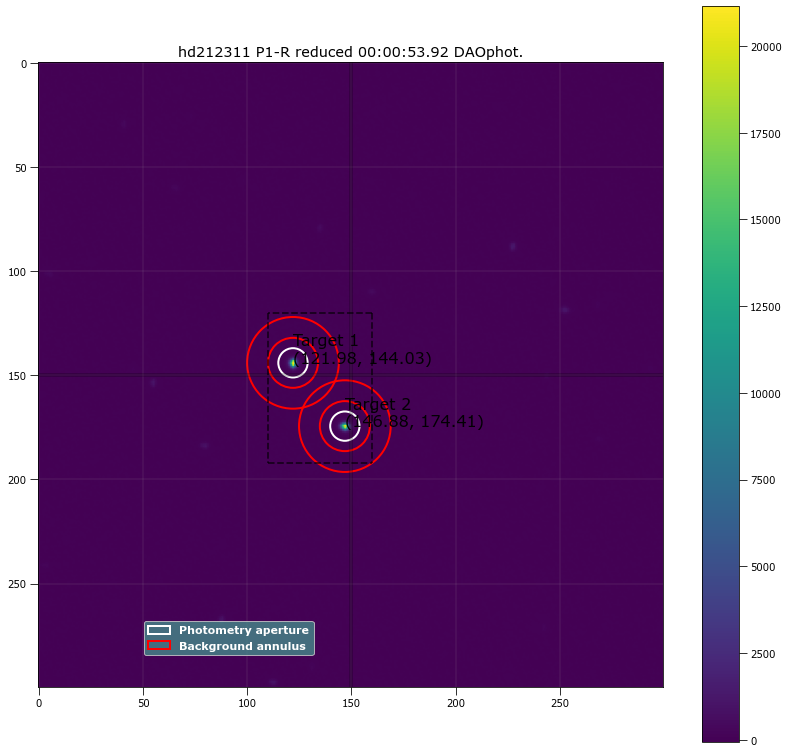

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 121.97583 144.02936 ...          4551.7075      15054.819          58.130341
  2 146.88218  174.4137 ...          4405.6459      14302.517          56.430987

 Aperture are: 155.52247705594192 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 121.97583 144.02936 ...                 4543.2437             189923.89
  2 146.88218  174.4137 ...                 4397.4295             191082.95

Write this out the excel
62 00:00:53.92 P1-R 2.0 7.03593220338983 121.97583028556112 144.0293624199436 189923.88530631576 4543.2437090179665 146

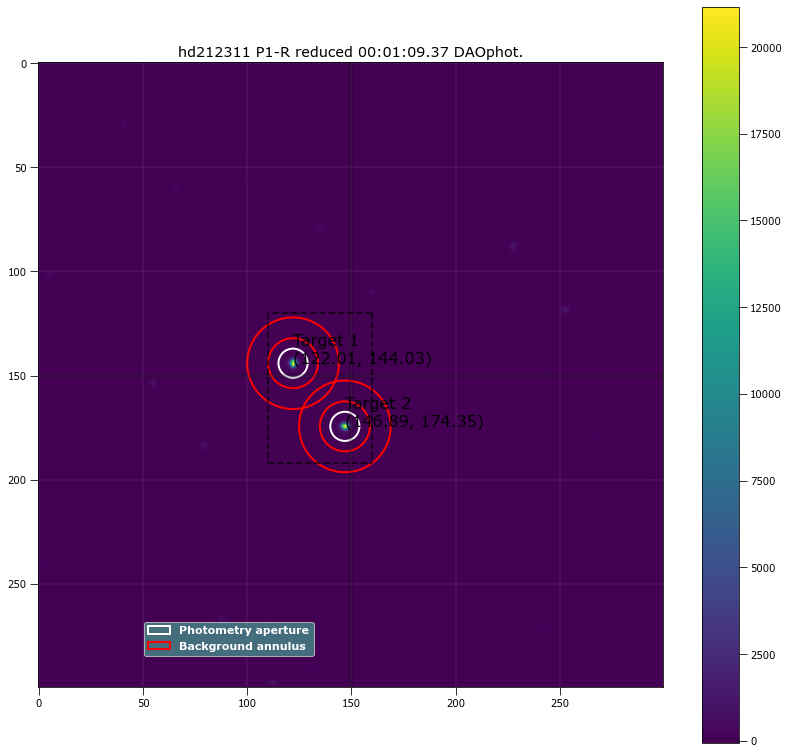

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 122.00556 144.03107 ...          4482.4658      13921.409          56.305675
  2 146.89004 174.34798 ...          4560.9079      14349.943          57.054024

 Aperture are: 153.79643469997063 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 122.00556 144.03107 ...                 4474.3586             188926.58
  2 146.89004 174.34798 ...                 4552.6929             190391.91

Write this out the excel
63 00:01:09.37 P1-R 2.0 6.996779661016949 122.00556373213328 144.0310706796732 188926.577428509 4474.358628419258 146.8

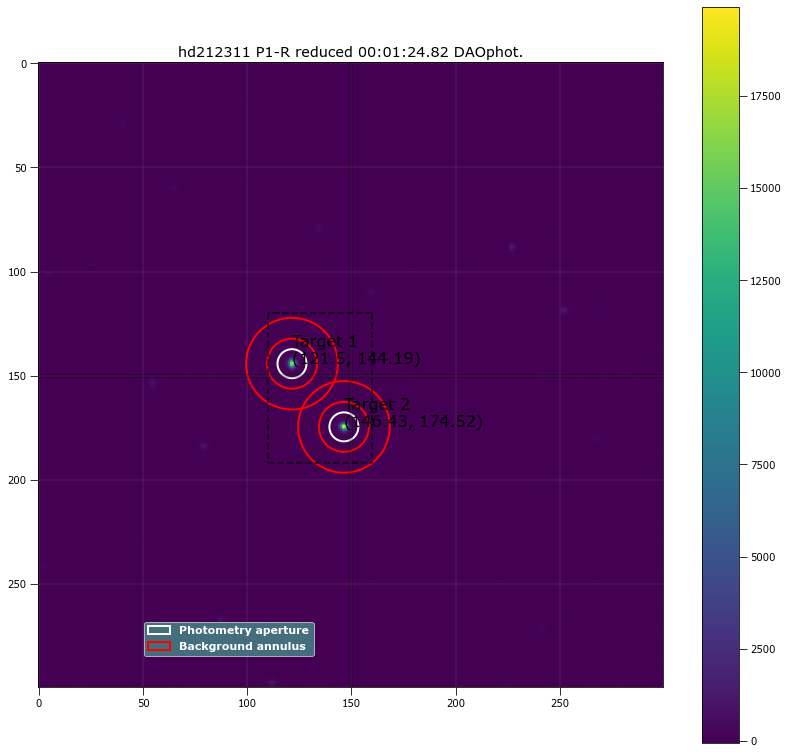

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 121.50457 144.18975 ...          4185.4029      14931.158          57.402821
  2 146.42771 174.51998 ...          4372.4114      14394.096          56.331626

 Aperture are: 152.0800239743118 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 121.50457 144.18975 ...                 4177.2299             182594.16
  2 146.42771 174.51998 ...                  4364.391              184243.9

Write this out the excel
64 00:01:24.82 P1-R 2.0 6.9576271186440675 121.50457072627715 144.18975491707573 182594.1648483234 4177.22994768067 146.

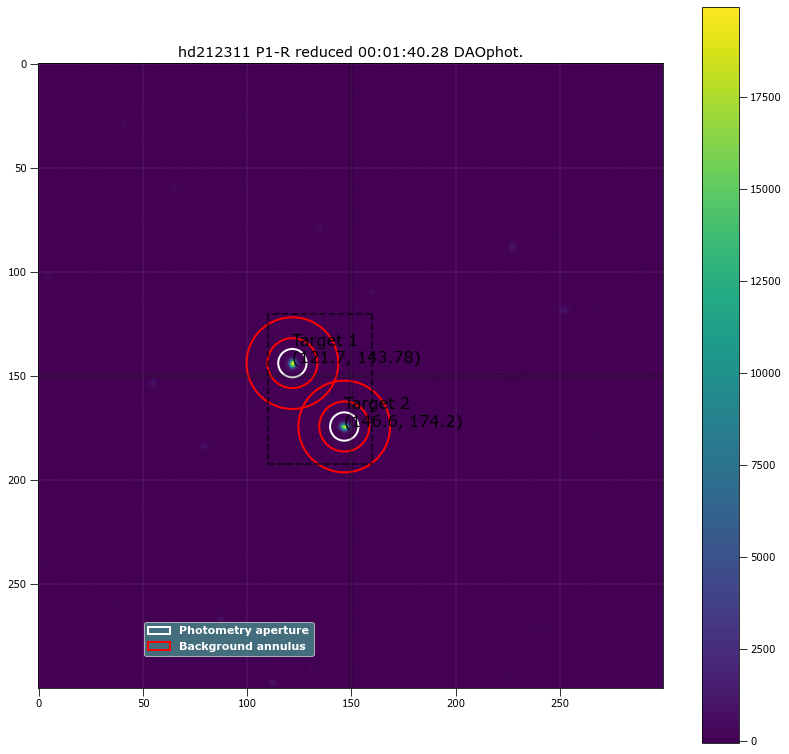

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 121.70097   143.776 ...          4459.8851       15066.64          57.744315
  2 146.59719 174.20464 ...          4251.2003      15196.424          58.791381

 Aperture are: 145.31069737480098 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 121.70097   143.776 ...                 4452.0295             189105.19
  2 146.59719 174.20464 ...                 4243.2023             189285.73

Write this out the excel
65 00:01:40.28 P1-R 2.0 6.801016949152542 121.70097179448777 143.77599880359244 189105.1862209812 4452.02953925246 146.

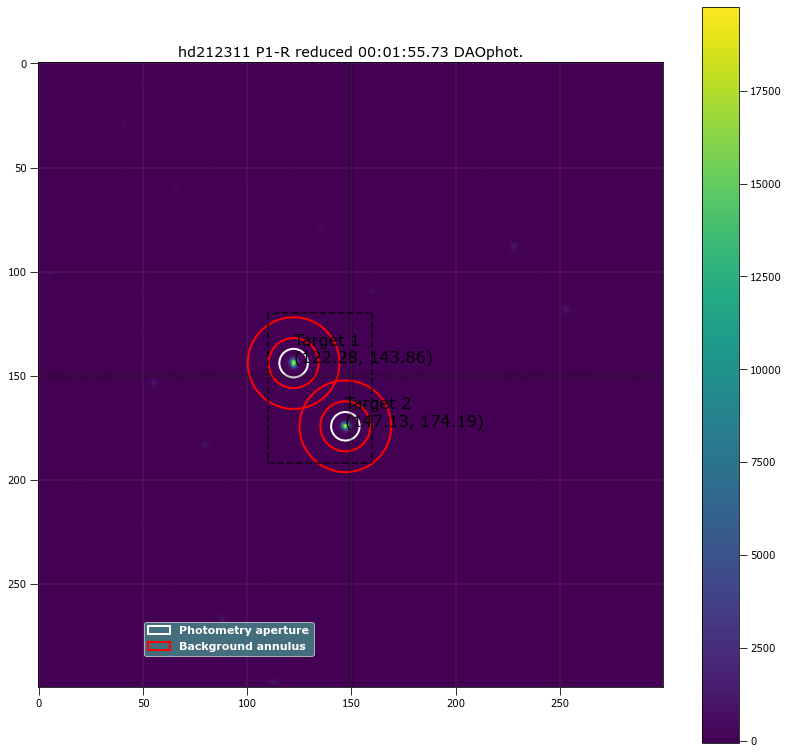

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 122.28074  143.8606 ...          4247.6361       14302.89          56.534551
  2 147.12603 174.18932 ...          4227.8272      14466.572          57.748121

 Aperture are: 146.98858157921 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 122.28074  143.8606 ...                 4239.8563             185299.01
  2 147.12603 174.18932 ...                 4219.8804             184933.23

Write this out the excel
66 00:01:55.73 P1-R 2.0 6.840169491525423 122.28073692772709 143.86059864135044 185299.01289326305 4239.856295554428 147.1

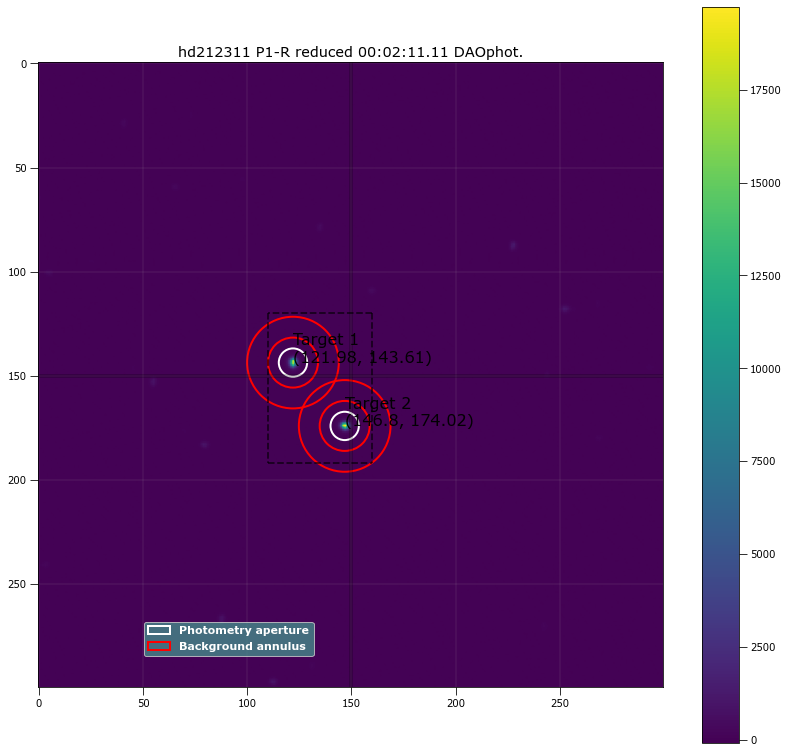

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 121.97515 143.61254 ...          3966.4556      14833.496          58.066051
  2 146.80219 174.01796 ...          4075.3472      15066.491          58.322035

 Aperture are: 145.31069737480098 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 121.97515 143.61254 ...                 3958.5562              177636.3
  2 146.80219 174.01796 ...                  4067.413             178208.93

Write this out the excel
67 00:02:11.11 P1-R 2.0 6.801016949152542 121.9751521497416 143.61254263636573 177636.29615352722 3958.5562200939275 14

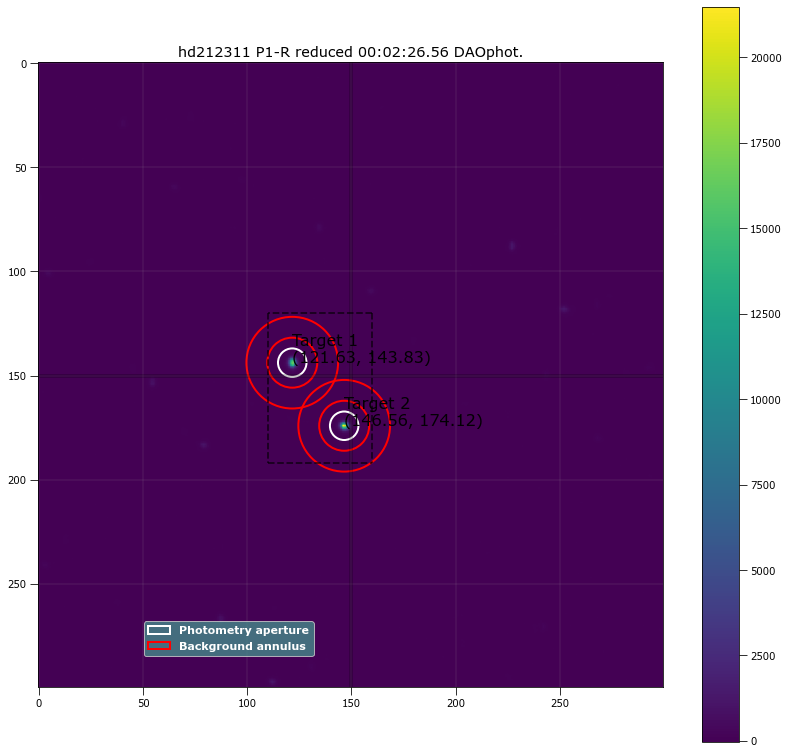

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1  121.6298 143.82757 ...          4122.6059      14885.879           57.40698
  2 146.56115 174.11503 ...          4338.9295      14458.945          57.006274

 Aperture are: 146.98858157921 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1  121.6298 143.82757 ...                  4114.706             181406.05
  2 146.56115 174.11503 ...                 4331.0848              183101.9

Write this out the excel
68 00:02:26.56 P1-R 2.0 6.840169491525423 121.62979662777607 143.8275734617464 181406.05331336323 4114.706008312085 146.56

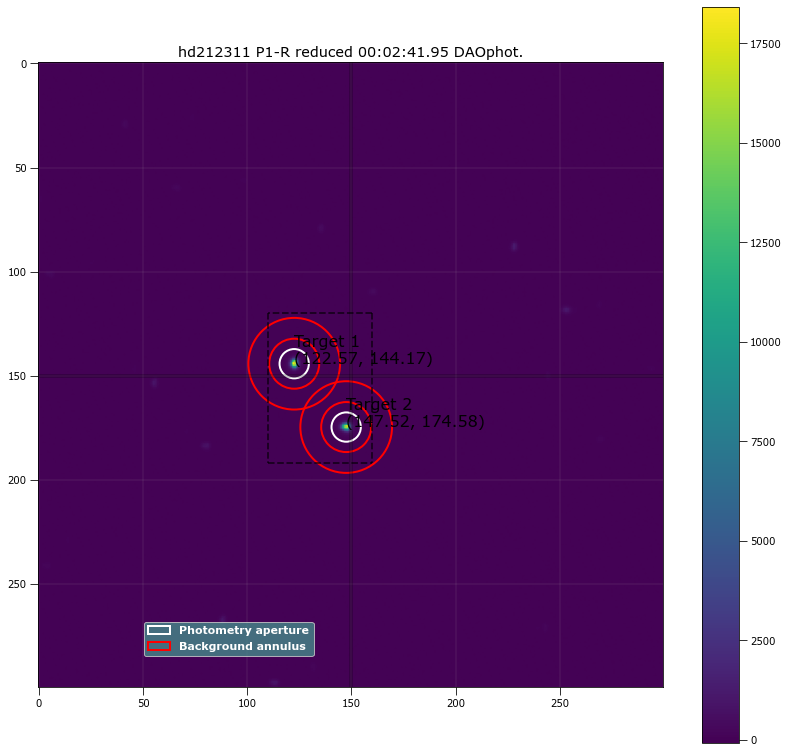

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 122.56969 144.16985 ...          4288.2207      13782.819          55.230377
  2 147.51921 174.57698 ...          4108.8536      14603.758          56.890642

 Aperture are: 155.52247705594192 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 122.56969 144.16985 ...                 4280.1791             187654.34
  2 147.51921 174.57698 ...                 4100.5703             188585.54

Write this out the excel
69 00:02:41.95 P1-R 2.0 7.03593220338983 122.56968694936178 144.16985392752423 187654.33802542265 4280.179081928345 147

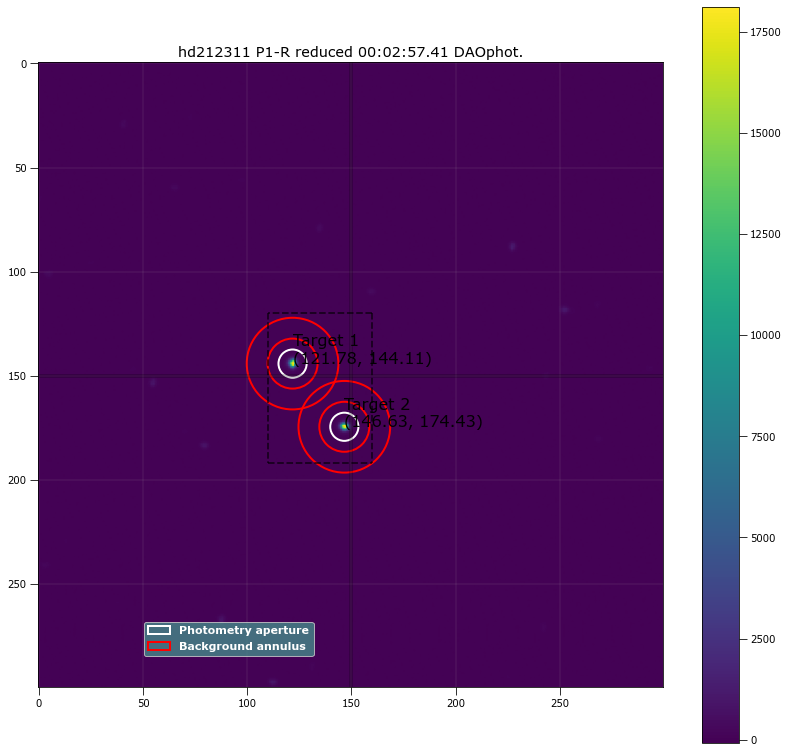

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 121.78302 144.10745 ...          4167.2502      14317.598          56.732275
  2 146.62804 174.43279 ...          4196.8784       14454.84          56.365252

 Aperture are: 143.6424448007044 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 121.78302 144.10745 ...                 4159.6209             183011.24
  2 146.62804 174.43279 ...                 4189.2984              184349.7

Write this out the excel
70 00:02:57.41 P1-R 2.0 6.761864406779661 121.78301790530884 144.10745473886283 183011.23729424138 4159.62091930154 146.

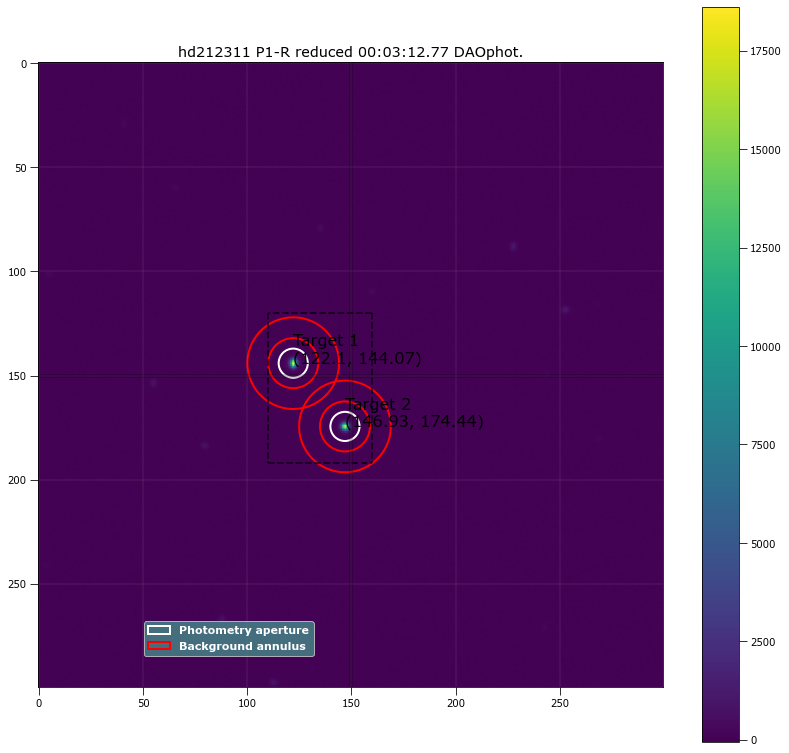

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 122.10295 144.07484 ...          4059.5436      14301.394          55.794833
  2 146.93473  174.4371 ...          4069.5396      14420.801          56.928536

 Aperture are: 153.79643469997063 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 122.10295 144.07484 ...                 4051.5099             182721.04
  2 146.93473  174.4371 ...                 4061.3428              183711.4

Write this out the excel
71 00:03:12.77 P1-R 2.0 6.996779661016949 122.10295099150775 144.0748390316567 182721.04278112427 4051.509935321999 146

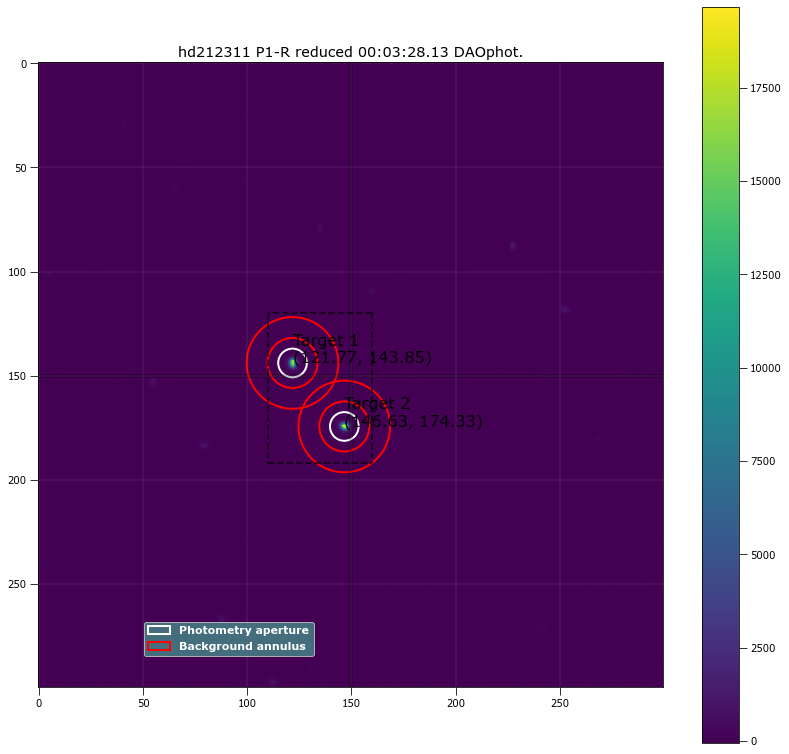

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 121.76572  143.8461 ...          4200.0653      14385.155          56.937158
  2  146.6263 174.32796 ...          4321.0391      14792.248          58.271739

 Aperture are: 148.6760974139315 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 121.76572  143.8461 ...                 4192.1402             184581.81
  2  146.6263 174.32796 ...                 4312.9282             184187.54

Write this out the excel
72 00:03:28.13 P1-R 2.0 6.879322033898305 121.76572153246451 143.84609706666456 184581.81048888696 4192.140166802518 146

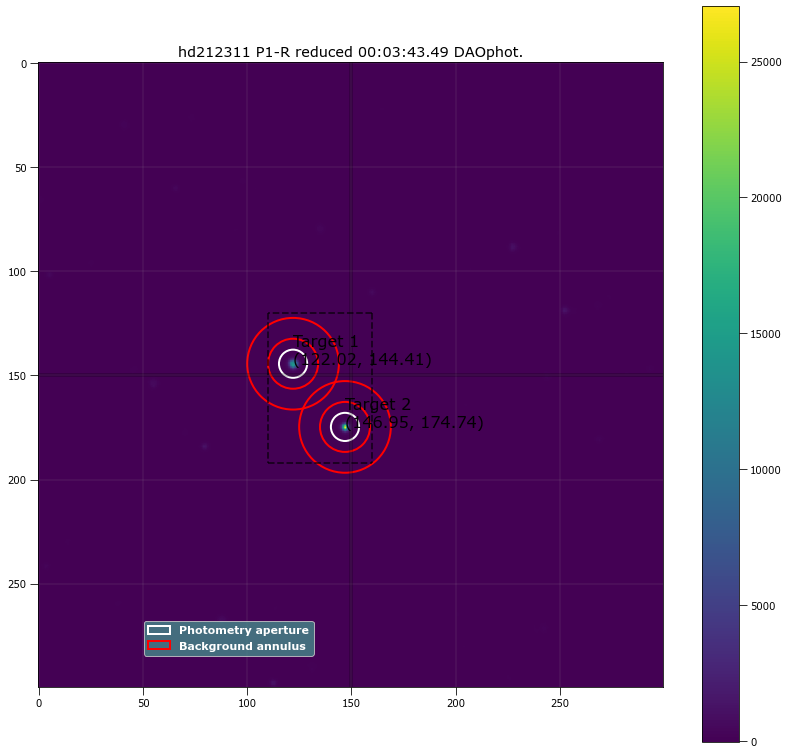

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 122.01875 144.40662 ...           3861.249      14580.988          57.026074
  2 146.94772 174.73729 ...          4739.2864      14419.526          57.147556

 Aperture are: 143.6424448007044 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 122.01875 144.40662 ...                 3853.5802             183015.68
  2 146.94772 174.73729 ...                 4731.6012             183204.42

Write this out the excel
73 00:03:43.49 P1-R 2.0 6.761864406779661 122.01875436771424 144.4066234083897 183015.68063428995 3853.5801689417362 146

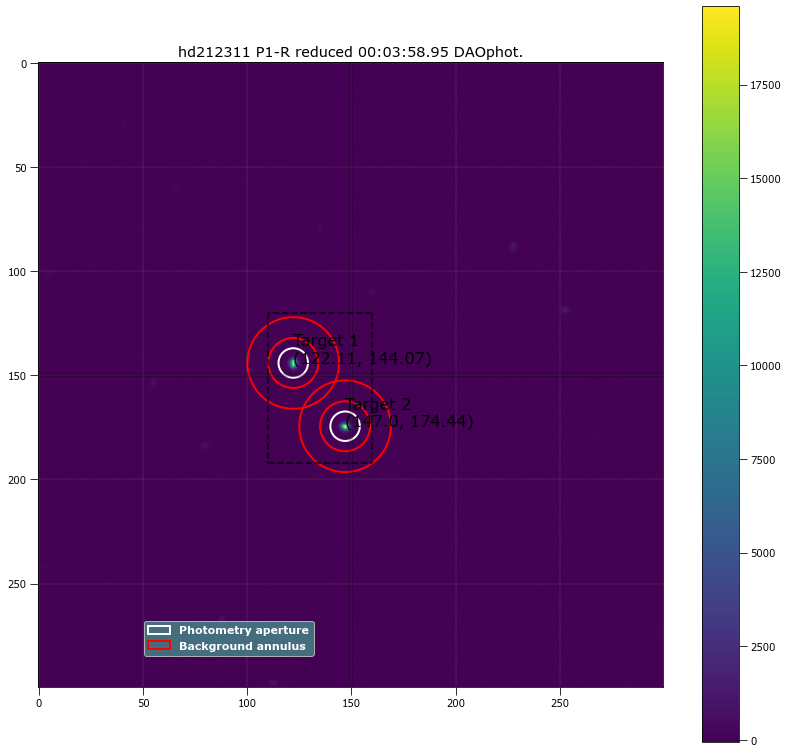

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 122.10893 144.07148 ...          4171.2088      14354.857          56.155593
  2 146.99944 174.43524 ...          4318.9008      15259.808          59.338888

 Aperture are: 157.25815104222565 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 122.10893 144.07148 ...                 4162.9413             183664.95
  2 146.99944 174.43524 ...                 4310.1646             184593.47

Write this out the excel
74 00:03:58.95 P1-R 2.0 7.0750847457627115 122.1089303173152 144.07147874184207 183664.94882834266 4162.941288406532 14

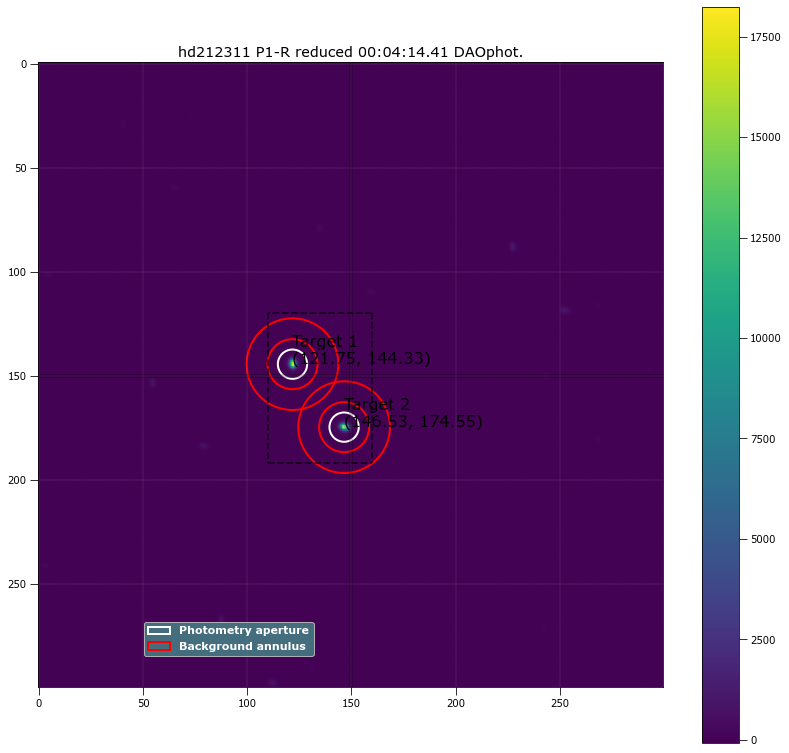

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 121.74943 144.33177 ...           4048.885      14623.881          55.644281
  2 146.52732 174.55147 ...          3895.5456      14774.417          57.742134

 Aperture are: 155.52247705594192 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 121.74943 144.33177 ...                 4040.7831              178440.5
  2 146.52732 174.55147 ...                 3887.1383             179631.56

Write this out the excel
75 00:04:14.41 P1-R 2.0 7.03593220338983 121.74943193961242 144.3317671925487 178440.4985111876 4040.783123404953 146.5

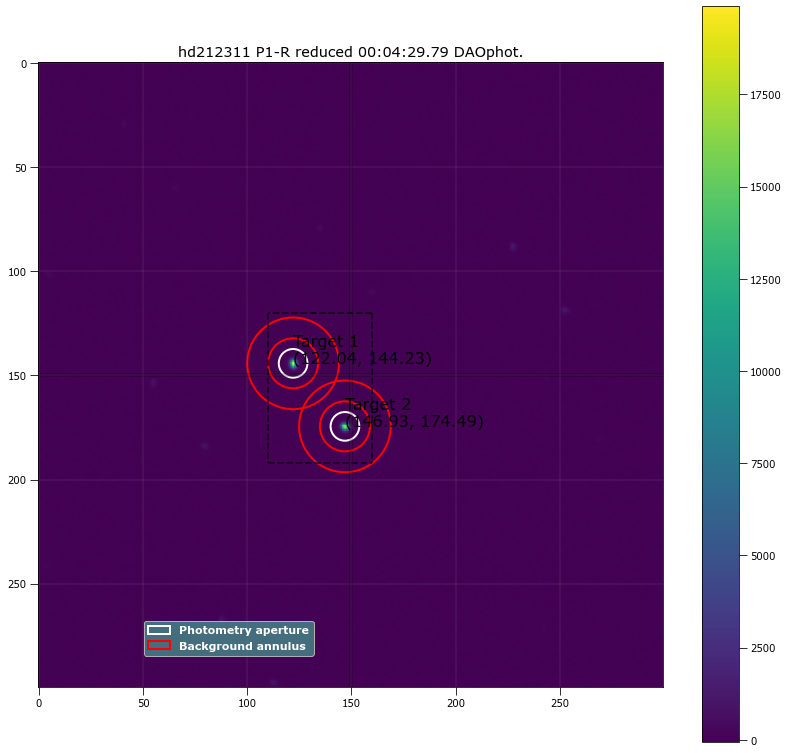

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 122.04312 144.23102 ...           4096.435      14554.964          56.193542
  2 146.92543  174.4914 ...          4051.6345      14585.701          57.452643

 Aperture are: 148.6760974139315 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 122.04312 144.23102 ...                 4088.6133             176084.87
  2 146.92543  174.4914 ...                 4043.6376             175797.18

Write this out the excel
76 00:04:29.79 P1-R 2.0 6.879322033898305 122.04311925954445 144.23101897347533 176084.871957216 4088.6133056065473 146.

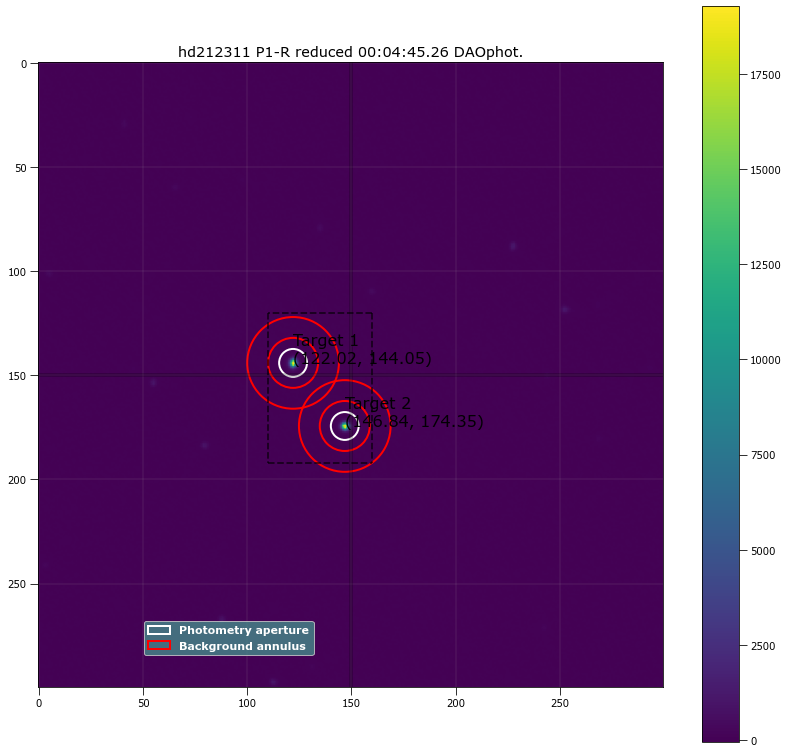

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 122.02304 144.05024 ...          4175.9103      14546.996          56.947894
  2 146.84353 174.34903 ...          4182.7147      14091.807          56.540809

 Aperture are: 140.3348345434486 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 122.02304 144.05024 ...                 4168.4283             182251.69
  2 146.84353 174.34903 ...                 4175.2862             182956.13

Write this out the excel
77 00:04:45.26 P1-R 2.0 6.683559322033898 122.02304137737971 144.05023566280738 182251.69434210873 4168.428327214139 146

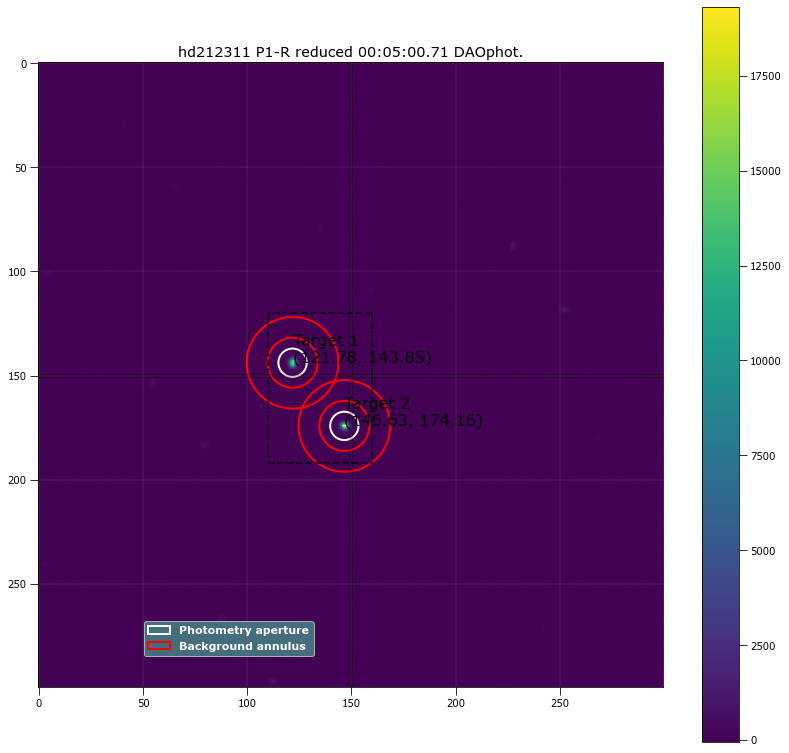

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 121.77916 143.84562 ...          3909.7827      14538.738           56.42642
  2 146.63411 174.16208 ...          4148.7082      15308.809          60.072762

 Aperture are: 145.31069737480098 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 121.77916 143.84562 ...                 3902.1064             180279.33
  2 146.63411 174.16208 ...                 4140.5359             181384.67

Write this out the excel
78 00:05:00.71 P1-R 2.0 6.801016949152542 121.77916275329662 143.8456154458083 180279.32571982036 3902.1064057406024 14

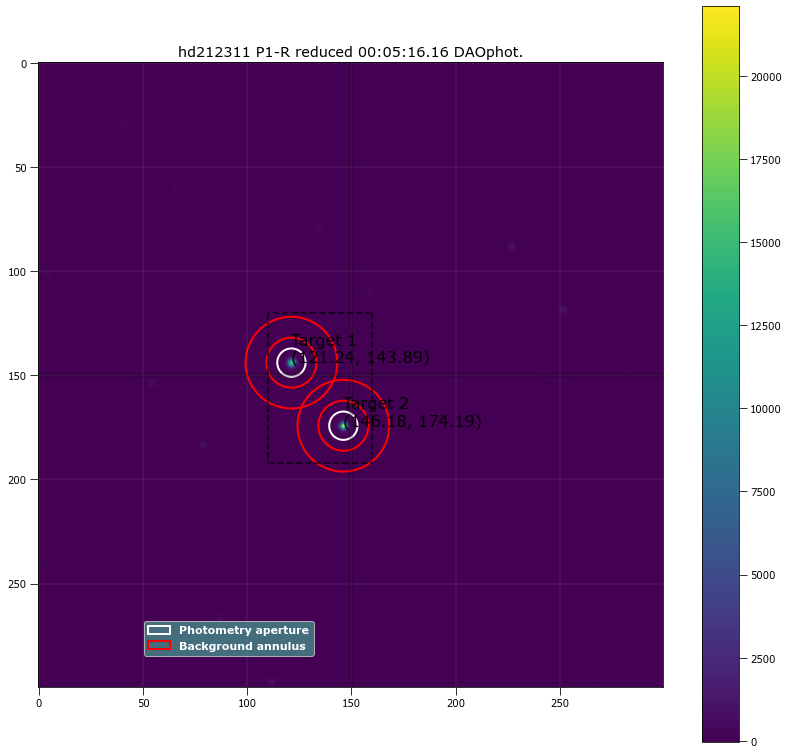

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 121.23509 143.89257 ...          3849.3935      14982.864          57.694448
  2 146.17507 174.18659 ...          4225.3843      15426.919          59.073794

 Aperture are: 145.31069737480098 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 121.23509 143.89257 ...                 3841.5447             176823.75
  2 146.17507 174.18659 ...                 4217.3479             177076.24

Write this out the excel
79 00:05:16.16 P1-R 2.0 6.801016949152542 121.2350858551581 143.89257456694136 176823.7490905653 3841.544734847306 146.

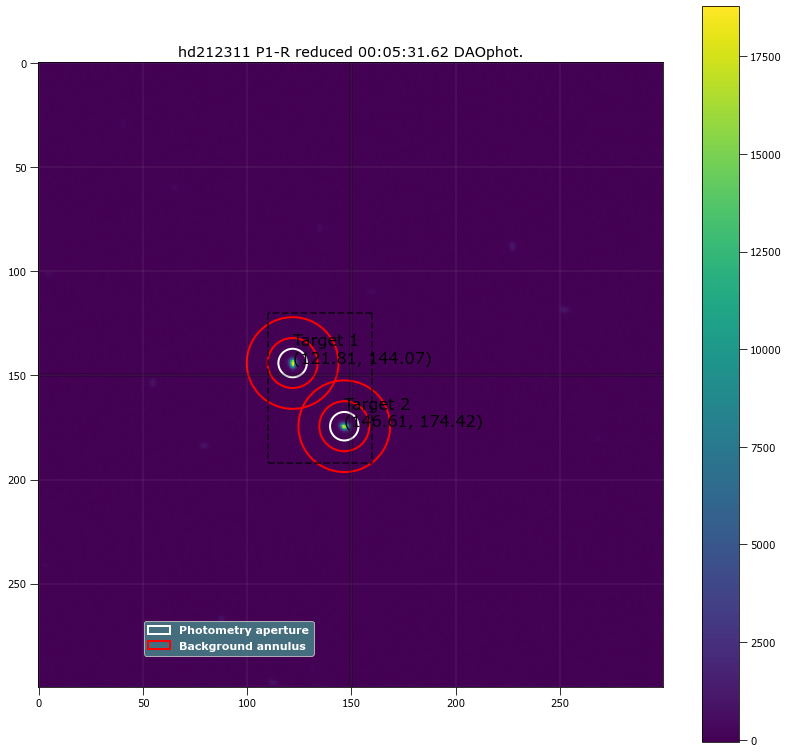

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 121.81301 144.07359 ...          4266.1556      14317.162          56.961582
  2 146.61023 174.41565 ...          4145.8117      14810.305          57.423666

 Aperture are: 146.98858157921 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 121.81301 144.07359 ...                  4258.317             183259.56
  2 146.61023 174.41565 ...                 4137.9095             183927.82

Write this out the excel
80 00:05:31.62 P1-R 2.0 6.840169491525423 121.81301424118556 144.07359416238342 183259.56484234513 4258.317038213732 146.6

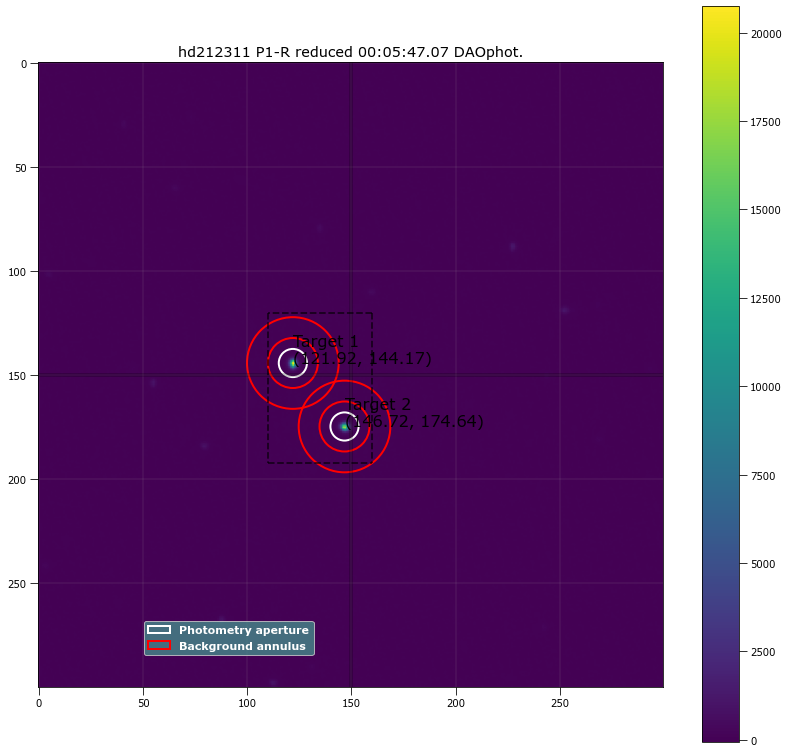

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 121.92392 144.16794 ...          4277.2406      14444.385          56.552781
  2 146.71868 174.63632 ...          4077.7049      14989.726          57.626606

 Aperture are: 143.6424448007044 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 121.92392 144.16794 ...                 4269.6355             185336.74
  2 146.71868 174.63632 ...                 4069.9553             185581.52

Write this out the excel
81 00:05:47.07 P1-R 2.0 6.761864406779661 121.92392097164694 144.16794249075477 185336.73544509624 4269.635455637826 146

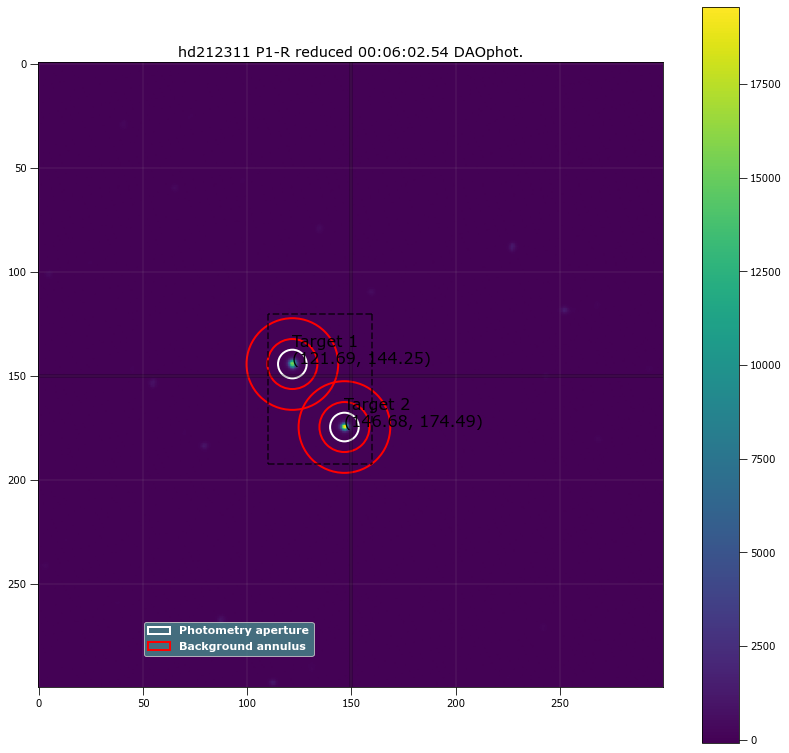

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 121.68708 144.24997 ...           3976.923      14290.351          55.971472
  2 146.67905  174.4934 ...          4361.8139      14750.567          57.372204

 Aperture are: 148.6760974139315 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 121.68708 144.24997 ...                 3969.1322             183769.94
  2 146.67905  174.4934 ...                 4353.8282             184867.72

Write this out the excel
82 00:06:02.54 P1-R 2.0 6.879322033898305 121.68708057054947 144.24996627079238 183769.93895015444 3969.1322124790754 14

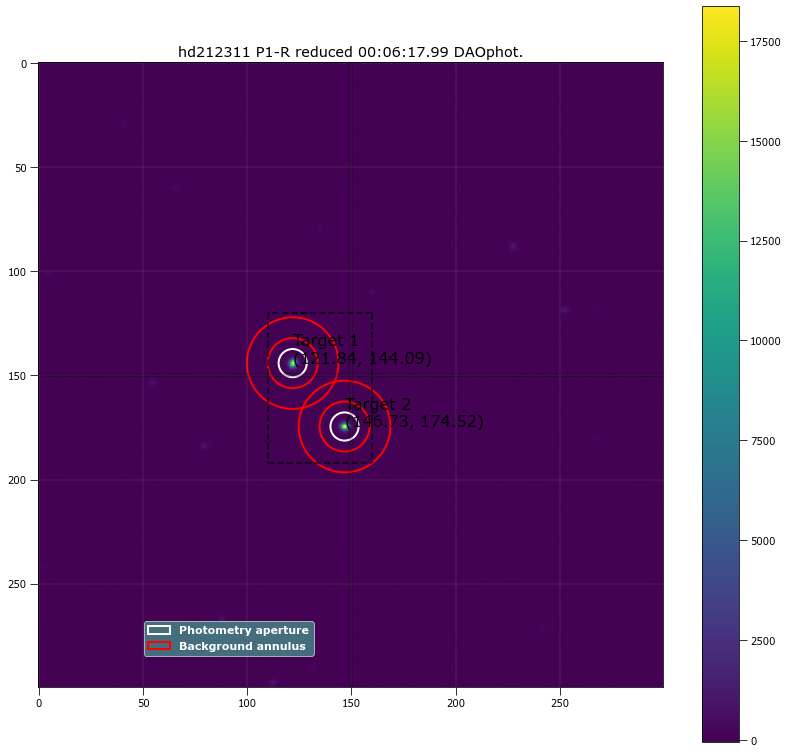

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 121.84155 144.09021 ...          4100.7866      14631.375          57.198309
  2 146.72619 174.52195 ...          4234.8535      15327.276          59.112568

 Aperture are: 143.6424448007044 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 121.84155 144.09021 ...                 4093.0947             185921.49
  2 146.72619 174.52195 ...                 4226.9041             186420.76

Write this out the excel
83 00:06:17.99 P1-R 2.0 6.761864406779661 121.8415494530538 144.0902069008428 185921.49261832458 4093.0946783941545 146.

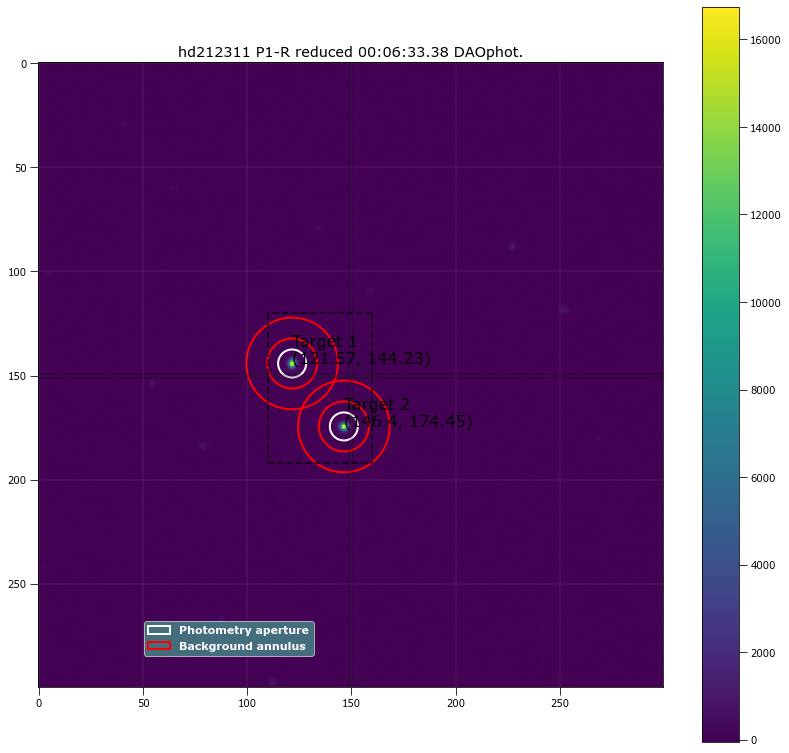

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 121.57012  144.2273 ...          3996.0607       13864.61          55.170073
  2 146.40439 174.44628 ...          3968.9911      14396.826          56.829096

 Aperture are: 141.98382385692028 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 121.57012  144.2273 ...                 3988.7272             183353.58
  2 146.40439 174.44628 ...                 3961.4371             184021.78

Write this out the excel
84 00:06:33.38 P1-R 2.0 6.722711864406779 121.57011526440394 144.22729693640764 183353.57975352177 3988.72715248545 146

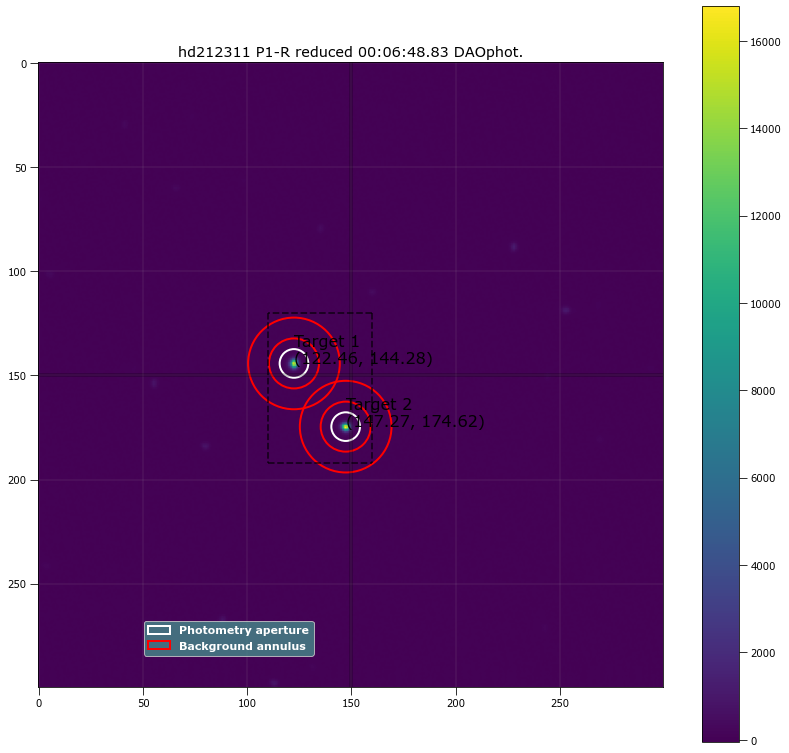

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 122.45516 144.27821 ...          3852.0506      14143.103           55.56924
  2 147.27322 174.61876 ...          3976.4946      14008.779          55.765807

 Aperture are: 148.6760974139315 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 122.45516 144.27821 ...                 3844.3159             186178.06
  2 147.27322 174.61876 ...                 3968.7325             187129.52

Write this out the excel
85 00:06:48.83 P1-R 2.0 6.879322033898305 122.45515589299491 144.2782055066036 186178.05948059037 3844.315889033837 147.

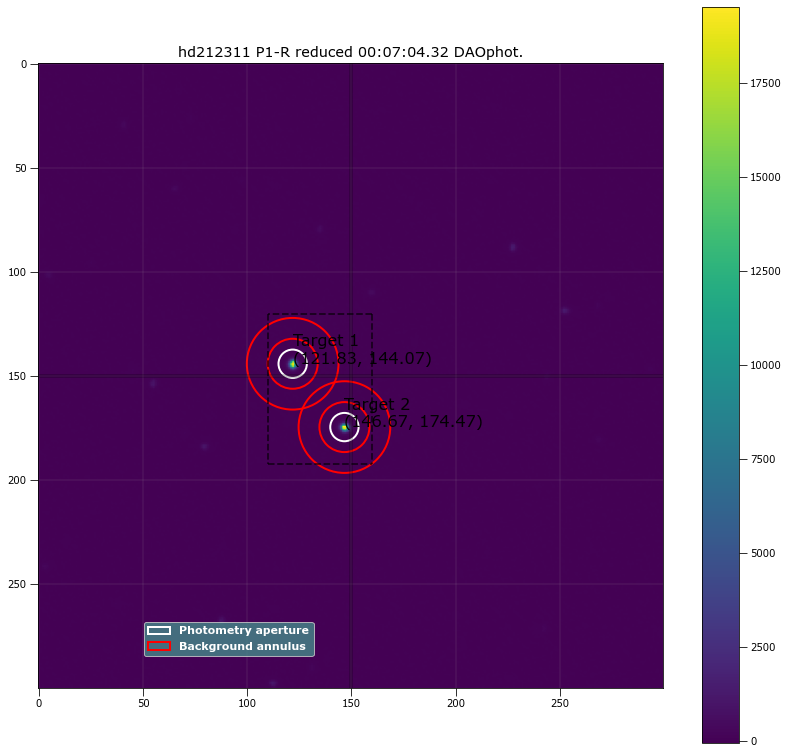

 id xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
      pix       pix    ...                                                     
--- -------- --------- ... ------------------ -------------- ------------------
  1  121.832 144.06951 ...          4442.7551       14367.69          56.504812
  2 146.6737  174.4663 ...          4535.6102      13905.933           56.35227

 Aperture are: 145.31069737480098 Annulus Area: 1068.1415022205297 

 id xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
      pix       pix    ...                                                
--- -------- --------- ... ------------------------- ---------------------
  1  121.832 144.06951 ...                 4435.0681             190510.71
  2 146.6737  174.4663 ...                  4527.944             191004.61

Write this out the excel
86 00:07:04.32 P1-R 2.0 6.801016949152542 121.83199928827838 144.06951224574232 190510.7133583066 4435.068144712455 146.673695290

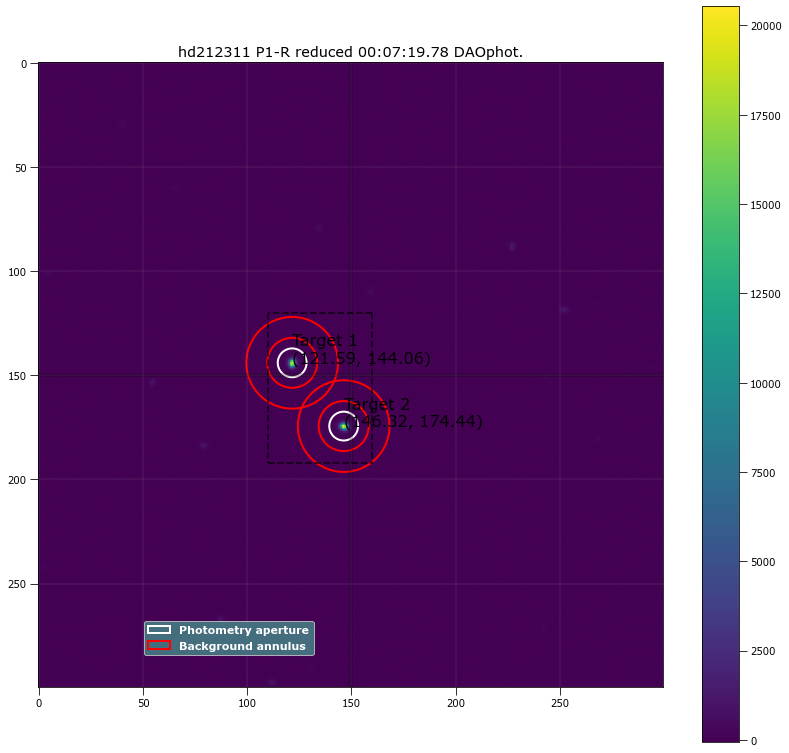

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 121.59115 144.06143 ...          4521.6788      14287.321          56.180332
  2 146.32466 174.43658 ...          4497.6609      14527.829          57.699872

 Aperture are: 150.37324487896544 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 121.59115 144.06143 ...                 4513.7697              191399.3
  2 146.32466 174.43658 ...                 4489.5379             192564.01

Write this out the excel
87 00:07:19.78 P1-R 2.0 6.918474576271186 121.59114524623092 144.06142815807647 191399.3034994689 4513.769745164544 146

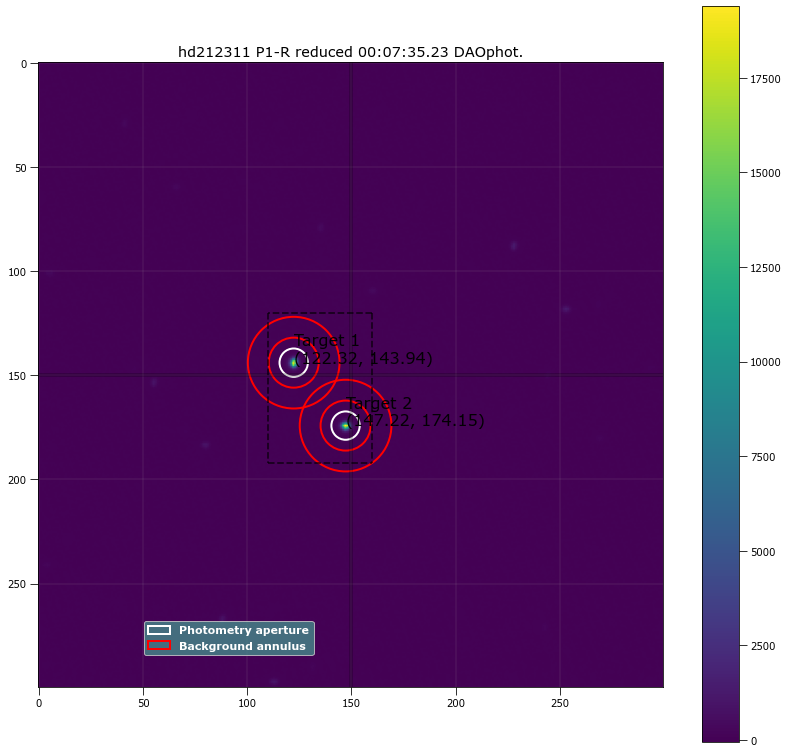

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 122.32349 143.93561 ...          4293.2038      13768.977          55.128329
  2 147.22454  174.1483 ...          4303.6909      14180.575          56.305594

 Aperture are: 145.31069737480098 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 122.32349 143.93561 ...                 4285.7041             194575.46
  2 147.22454  174.1483 ...                  4296.031             195641.59

Write this out the excel
88 00:07:35.23 P1-R 2.0 6.801016949152542 122.32348887211504 143.93561033785267 194575.46003777158 4285.704062842556 14

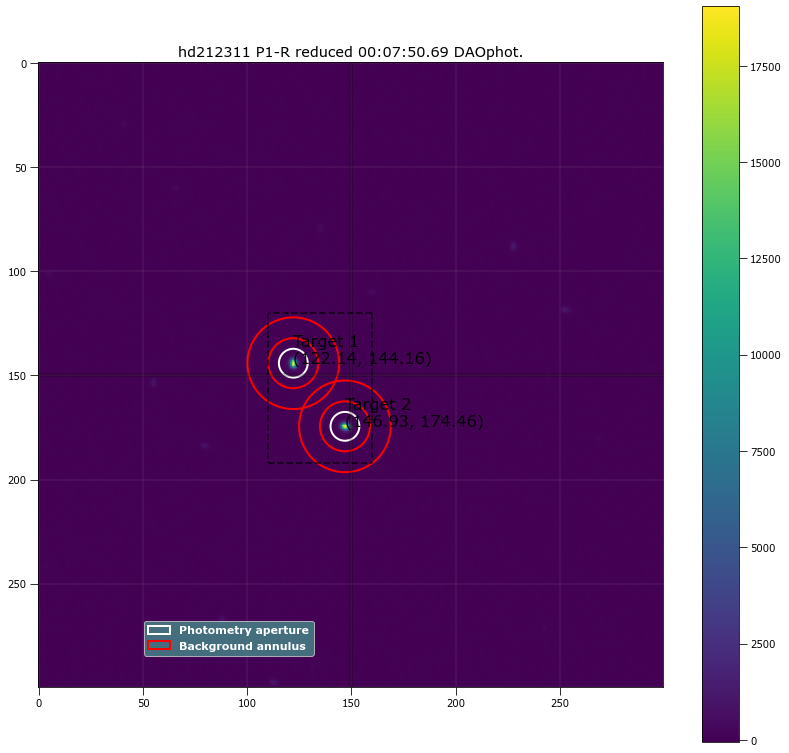

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 122.13784 144.16305 ...          4369.7636      14807.712          57.767454
  2 146.92782 174.46265 ...          4377.8576      14677.328          58.443779

 Aperture are: 150.37324487896544 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 122.13784 144.16305 ...                 4361.6311             194209.29
  2 146.92782 174.46265 ...                 4369.6298             195275.29

Write this out the excel
89 00:07:50.69 P1-R 2.0 6.918474576271186 122.13784087305118 144.16304649764754 194209.28639088233 4361.631129467305 14

In [67]:
#The pipe!
#we expect 4 targets
#37 doesnt work
#Here is a work around. Incorporate the peak finder into the pipeline and tell the process such that if DAO cannot find the 
#targets, use the peak find coordinates. I suspect the problem is the FWHM.

#P1-R Filter
print("P1-R Filter")

res_apt_sum_list = []

start = 60
end = 90
filename = astropy.io.fits.open(pol_std[start])[0].header['OBJECT']+"_"+astropy.io.fits.open(pol_std[start])[0].header['FILTER']

workbook = xlsxwriter.Workbook('./stats/'+MJD+"_"+ filename+str(start)+"-" +str(end)  +'.xlsx')
worksheet = workbook.add_worksheet()
worksheet.write('A1', 'int')
worksheet.write('B1', 'time obs')
worksheet.write('C1', 'filter')
worksheet.write('D1', 'exptime')
worksheet.write('E1', 'aperture radius')
worksheet.write('F1', 'pol_std 1 x center')
worksheet.write('G1', 'pol_std 1 y center')
worksheet.write('H1', 'pol_std 1 counts')
worksheet.write('I1', 'pol_std 1 error')
worksheet.write('J1', 'pol_std 2 x center')
worksheet.write('K1', 'pol_std 2 y center')
worksheet.write('L1', 'pol_std 2 counts')
worksheet.write('M1', 'pol_std 2 error')
worksheet.write('N1', 'q')
worksheet.write('O1', 'q error')
worksheet.write('P1', 'u')
worksheet.write('Q1', 'u error')
worksheet.write('R1', 'PD')
worksheet.write('S1', 'PD error')
worksheet.write('T1', 'PA')
worksheet.write('U1', 'PA error')
row = 1
column = 0
search_off = 150
siegma_search = 3
search_bracket =[30, 42, 40, 10]

for k in range(start, end):
    reduced_obj = funcs_calib_and_plot.plot_double_raw_v_reduced(astropy.io.fits.open(pol_std[k]),
                                        [512, 512, 512, 512], 
                                        (m_biast, m_dark, p_1_m_flat), 
                                        False, True, False)

    trial_radii = np.linspace(5, 9.62, num=60)
    pol_std_a = []
    pol_std_b = []
    for radii in trial_radii:
        DAO_positions = funcs_star_finder.dao_star_finder(reduced_obj, search_bracket, siegma_search, 
                                                          700, search_off, radii, 12 , 22, False, False)
        
        if (len(DAO_positions) != 2):
            x_targ, y_targ, peak_targ  = funcs_polarimetry.source_peak_finder_pol_std(reduced_obj, 4, search_bracket, 650, False, False) #what do I return from this?
            apt_pos = funcs_star_finder.plot_spotted(reduced_obj, search_off, search_bracket , x_targ, y_targ, peak_targ, False, False)
            DAO_positions = funcs_star_finder.peak_to_DAO(apt_pos)        
        
        phot_tab = funcs_apt_phot.apt_phot_local_bkg_sub(reduced_obj, search_off, search_bracket, DAO_positions, radii, 12 , 22, False, False)
        pol_std_a.append(phot_tab['residual_aperture_sum'][0])
        pol_std_b.append(phot_tab['residual_aperture_sum'][1])

    combine_pol_std = [pol_std_a, pol_std_b]
    
    good_radii=funcs_apt_phot.solve_apt(combine_pol_std, trial_radii, False)

    phot_tab = funcs_apt_phot.apt_phot_local_bkg_sub(reduced_obj, search_off, search_bracket, DAO_positions,good_radii, 12 , 22, True, False)

    res_apt_sum_list.append(phot_tab['residual_aperture_sum'])
    
    print("\nWrite this out the excel")
    print(k, 
          astropy.io.fits.open(pol_std[k])[0].header['TIME-OBS'],
          astropy.io.fits.open(pol_std[k])[0].header['FILTER'],
          astropy.io.fits.open(pol_std[k])[0].header['EXPTIME'],
          good_radii,
          phot_tab['xcenter'][0].value, phot_tab['ycenter'][0].value,
          phot_tab['residual_aperture_sum'][0], phot_tab['residual_aperture_sum_err'][0],
          phot_tab['xcenter'][1].value, phot_tab['ycenter'][1].value,
          phot_tab['residual_aperture_sum'][1], phot_tab['residual_aperture_sum_err'][1],"\n")
    
    write_this = [k, 
          astropy.io.fits.open(pol_std[k])[0].header['TIME-OBS'],
          astropy.io.fits.open(pol_std[k])[0].header['FILTER'],
          astropy.io.fits.open(pol_std[k])[0].header['EXPTIME'],
          good_radii,
          phot_tab['xcenter'][0].value, phot_tab['ycenter'][0].value,
          phot_tab['residual_aperture_sum'][0], phot_tab['residual_aperture_sum_err'][0],
          phot_tab['xcenter'][1].value, phot_tab['ycenter'][1].value,
          phot_tab['residual_aperture_sum'][1], phot_tab['residual_aperture_sum_err'][1]] #,

    for item in write_this :
        worksheet.write(row, column, item)
        column += 1
        
    column = 0
    row += 1
    
workbook.close()

pol_std_1 = []
pol_std_2 = []

for things in res_apt_sum_list:
    pol_std_1.append(things[0])
    pol_std_2.append(things[1])

P3-R Filter
Aperture radius for 00:46:31.30 is 6.840169491525423


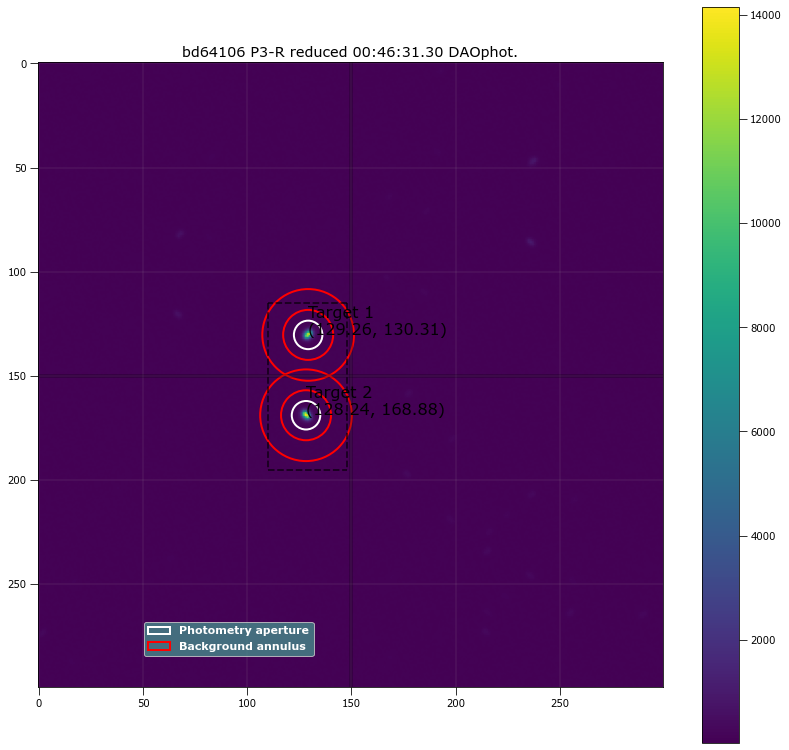

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 129.26325 130.31239 ...           3333.938      84769.682          263.19832
  2 128.24131   168.878 ...          3515.5307      83288.443          257.84576

 Aperture are: 146.98858157921 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 129.26325 130.31239 ...                 3297.7189             162381.65
  2 128.24131   168.878 ...                 3480.0482             170293.97

Write this out the excel
30 00:46:31.30 P3-R 10.0 6.840169491525423 129.2632538822064 130.31238824216268 162381.64987947236 3297.7188628456715 128.

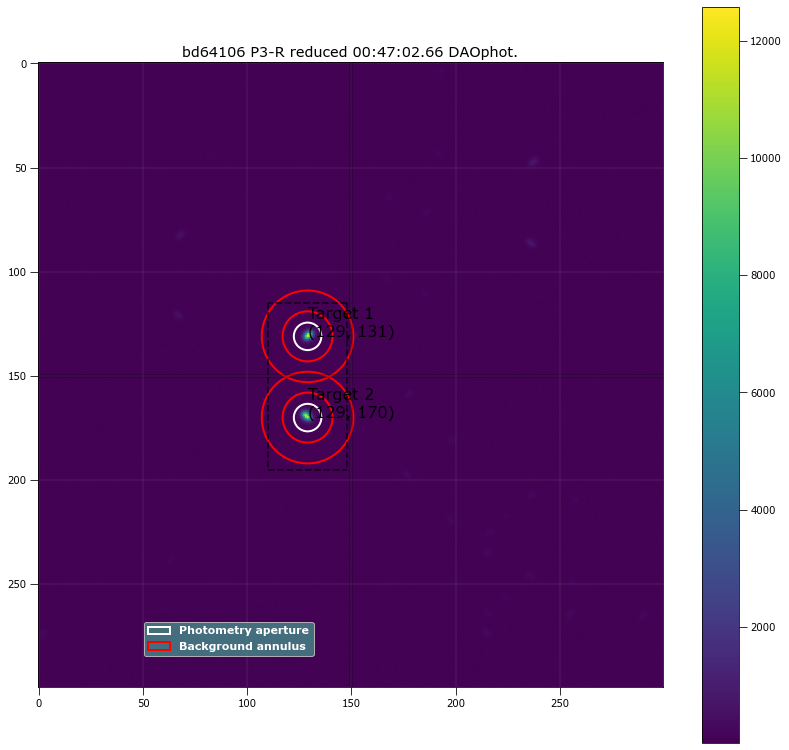

 id xcenter ycenter ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
      pix     pix   ...                                                     
--- ------- ------- ... ------------------ -------------- ------------------
  1     129     131 ...          3150.2406      86192.666          267.58408
  2     129     170 ...          3212.7777       84019.98          260.10707

 Aperture are: 137.06575080744258 Annulus Area: 1068.1415022205297 

 id xcenter ycenter ... residual_aperture_sum_err residual_aperture_sum
      pix     pix   ...                                                
--- ------- ------- ... ------------------------- ---------------------
  1     129     131 ...                 3115.9037             159621.61
  2     129     170 ...                 3179.4003             168214.13

Write this out the excel
31 00:47:02.66 P3-R 10.0 6.605254237288135 129.0 131.0 159621.61025890874 3115.903744362153 129.0 170.0 168214.12919617933 3179.4003387148728 

Aperture radius

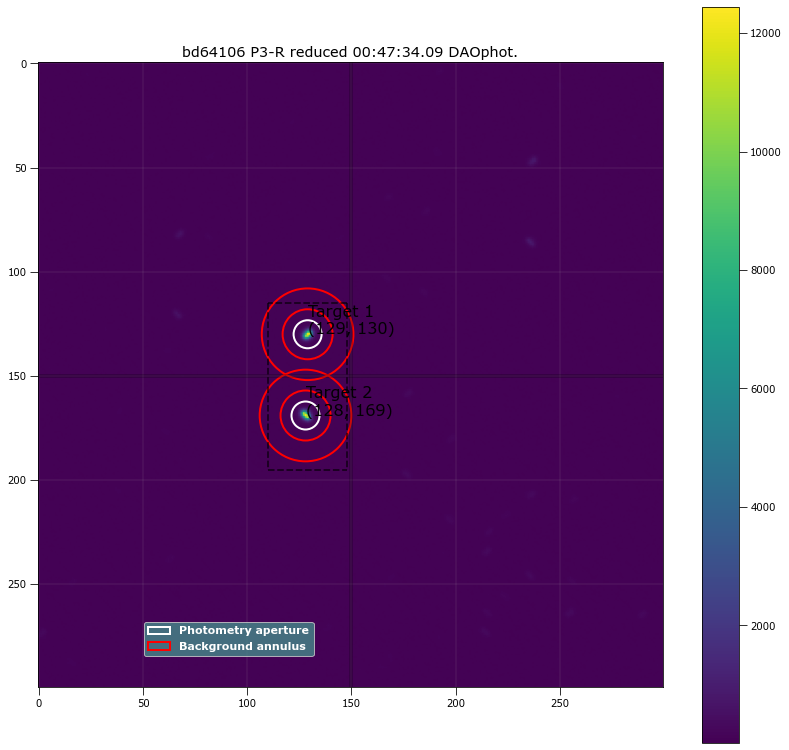

 id xcenter ycenter ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
      pix     pix   ...                                                     
--- ------- ------- ... ------------------ -------------- ------------------
  1     129     130 ...          3218.8044      84849.241          263.44906
  2     128     169 ...          3311.3335      83839.252          259.78027

 Aperture are: 141.98382385692028 Annulus Area: 1068.1415022205297 

 id xcenter ycenter ... residual_aperture_sum_err residual_aperture_sum
      pix     pix   ...                                                
--- ------- ------- ... ------------------------- ---------------------
  1     129     130 ...                 3183.7851             162289.25
  2     128     169 ...                  3276.802             169944.88

Write this out the excel
32 00:47:34.09 P3-R 10.0 6.722711864406779 129.0 130.0 162289.2454555226 3183.785132377035 128.0 169.0 169944.8837640925 3276.8019763706743 

Aperture radius f

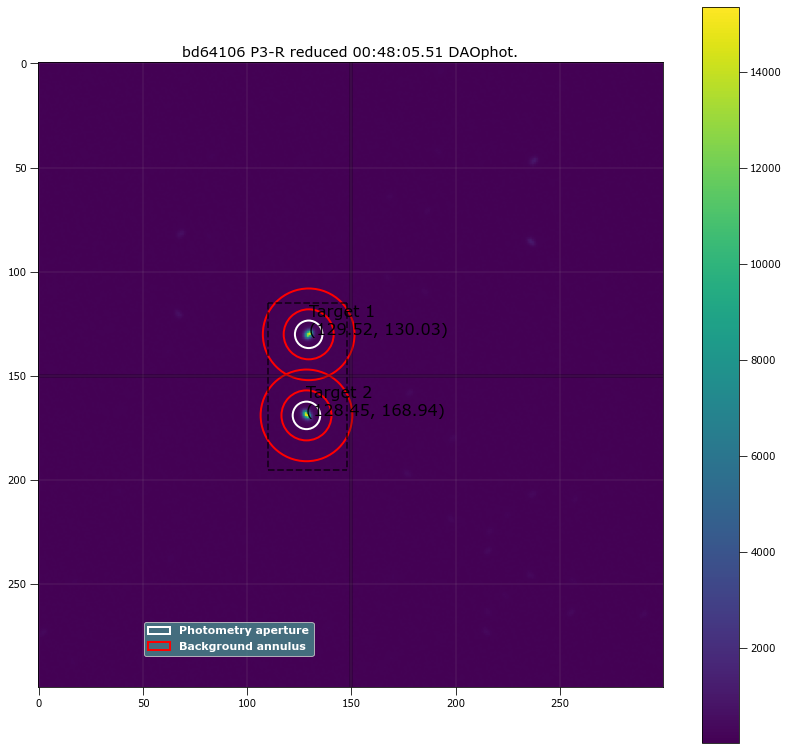

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 129.52137 130.03129 ...          3501.9681      85116.667          264.37369
  2 128.45025 168.94369 ...          3669.3884      83111.883          257.72552

 Aperture are: 137.06575080744258 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 129.52137 130.03129 ...                 3468.0432             164012.37
  2 128.45025 168.94369 ...                 3636.3166             172677.12

Write this out the excel
33 00:48:05.51 P3-R 10.0 6.605254237288135 129.52137455496108 130.03129016198767 164012.3704793864 3468.0432480421805 1

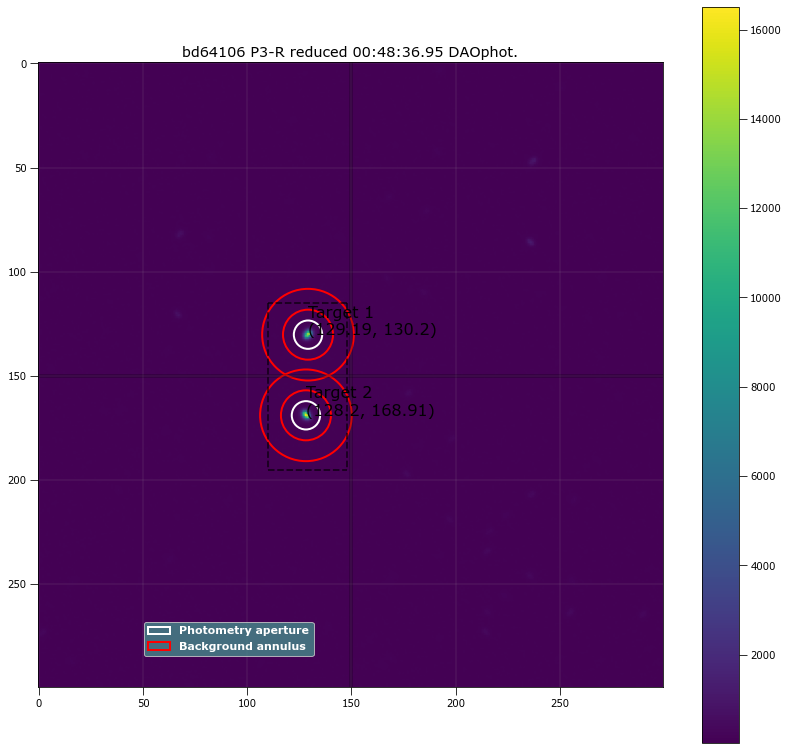

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 129.19107 130.20176 ...          3540.7548       84065.34          261.20134
  2 128.20175 168.90998 ...          3813.1511       81921.76           253.8272

 Aperture are: 145.31069737480098 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 129.19107 130.20176 ...                 3505.2208              166469.7
  2 128.20175 168.90998 ...                 3778.6203             176025.17

Write this out the excel
34 00:48:36.95 P3-R 10.0 6.801016949152542 129.19106558963068 130.20175516950755 166469.69587787657 3505.220766612718 1

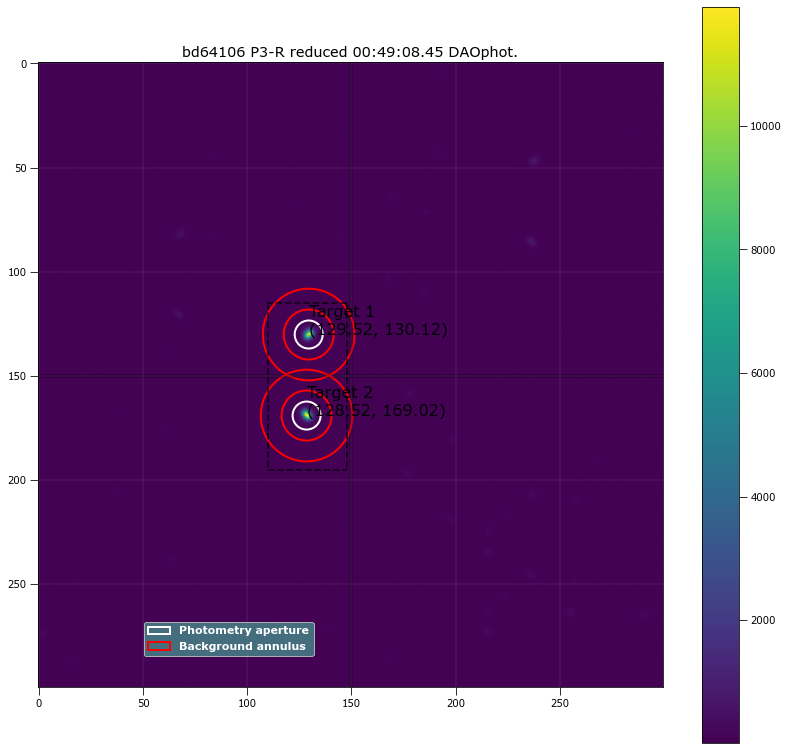

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 129.52472 130.12118 ...          3038.9205      83499.149          259.23286
  2 128.52255 169.02483 ...            3208.74      82901.893          256.81481

 Aperture are: 141.98382385692028 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 129.52472 130.12118 ...                 3004.4617             165409.25
  2 128.52255 169.02483 ...                 3174.6026              173562.6

Write this out the excel
35 00:49:08.45 P3-R 10.0 6.722711864406779 129.52471628436155 130.1211827738337 165409.24867881963 3004.461656849152 12

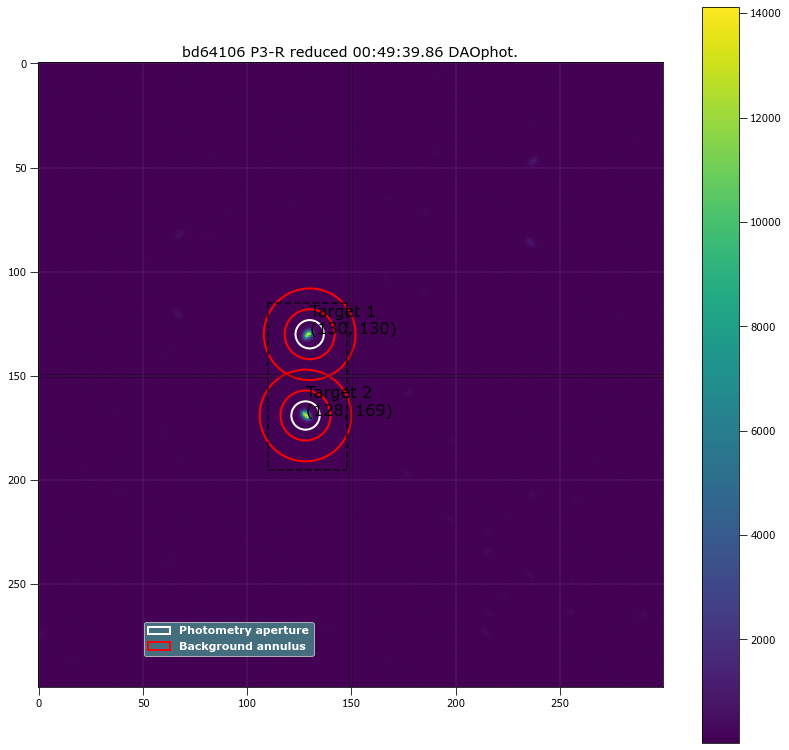

 id xcenter ycenter ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
      pix     pix   ...                                                     
--- ------- ------- ... ------------------ -------------- ------------------
  1     130     130 ...          3432.2076      84482.634          262.45928
  2     128     169 ...          3575.7404      82157.166          254.61273

 Aperture are: 145.31069737480098 Annulus Area: 1068.1415022205297 

 id xcenter ycenter ... residual_aperture_sum_err residual_aperture_sum
      pix     pix   ...                                                
--- ------- ------- ... ------------------------- ---------------------
  1     130     130 ...                 3396.5025             166047.29
  2     128     169 ...                 3541.1027             173741.73

Write this out the excel
36 00:49:39.86 P3-R 10.0 6.801016949152542 130.0 130.0 166047.29358849087 3396.502475910811 128.0 169.0 173741.73215149646 3541.1027398782894 

Aperture radius

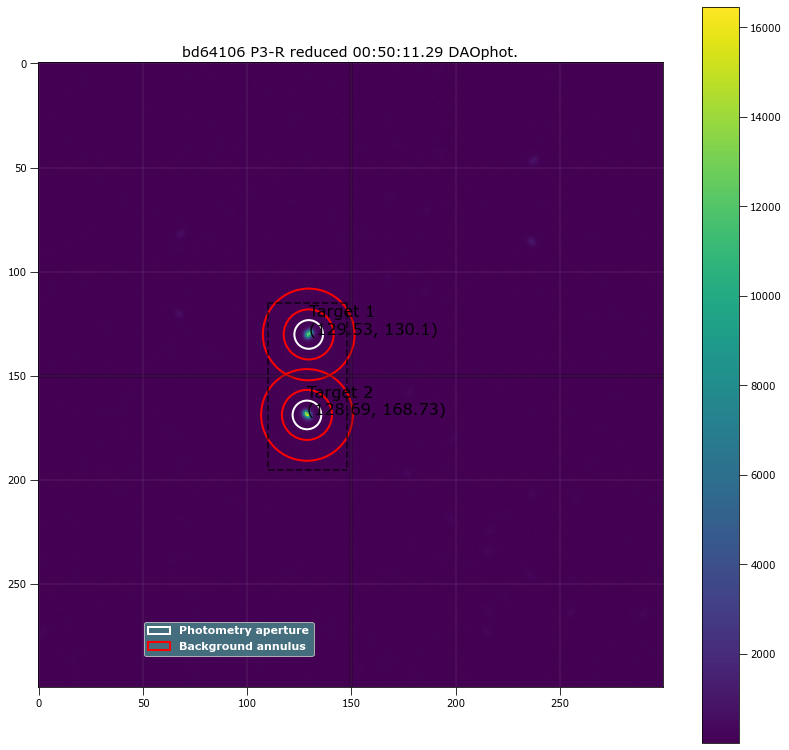

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 129.52677 130.09505 ...          3343.9571      85140.888          264.49156
  2 128.68621 168.73067 ...          3658.0611      83369.328          258.05696

 Aperture are: 148.6760974139315 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 129.52677 130.09505 ...                 3307.1422             163821.71
  2 128.68621 168.73067 ...                 3622.1418             171668.79

Write this out the excel
37 00:50:11.29 P3-R 10.0 6.879322033898305 129.52677231570433 130.09505239857256 163821.70560399888 3307.1421532739437 1

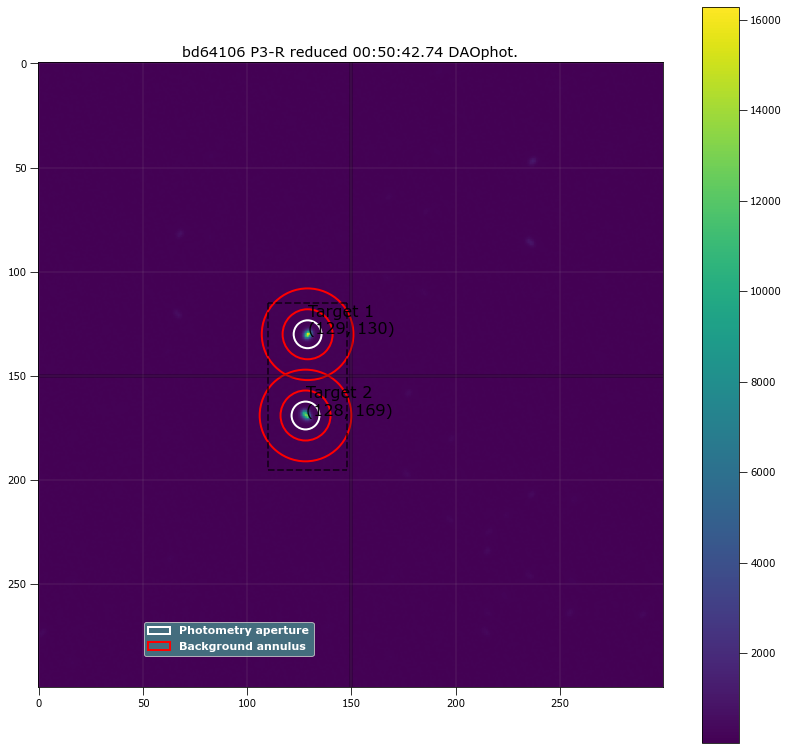

 id xcenter ycenter ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
      pix     pix   ...                                                     
--- ------- ------- ... ------------------ -------------- ------------------
  1     129     130 ...          3643.9339      84223.953          261.53048
  2     128     169 ...          3493.7042      83037.995          257.19434

 Aperture are: 140.3348345434486 Annulus Area: 1068.1415022205297 

 id xcenter ycenter ... residual_aperture_sum_err residual_aperture_sum
      pix     pix   ...                                                
--- ------- ------- ... ------------------------- ---------------------
  1     129     130 ...                 3609.5735             165465.62
  2     128     169 ...                 3459.9134             173449.15

Write this out the excel
38 00:50:42.74 P3-R 10.0 6.683559322033898 129.0 130.0 165465.61898302432 3609.57345312362 128.0 169.0 173449.15481287587 3459.913435553618 

Aperture radius fo

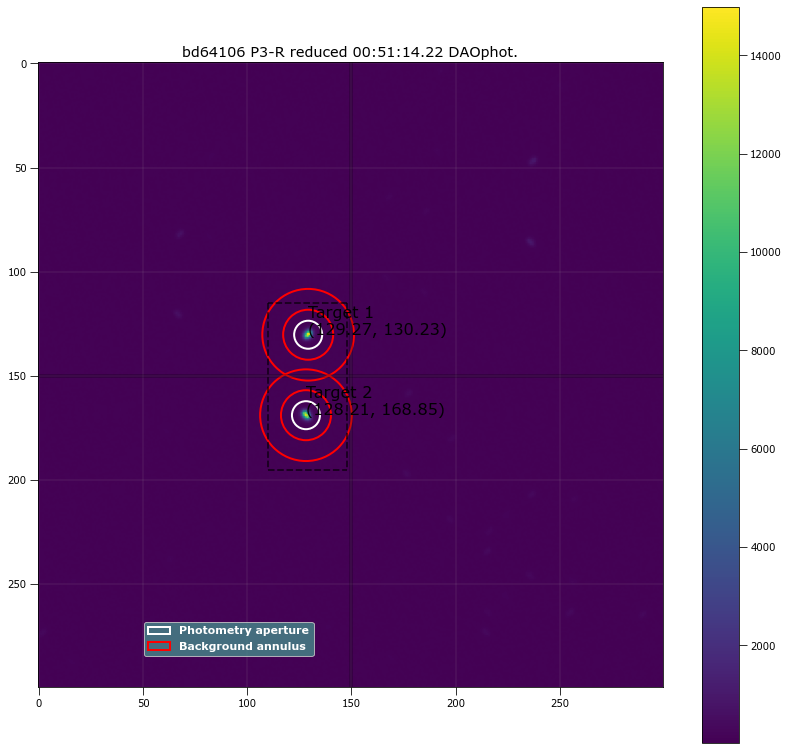

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 129.26565  130.2318 ...          3622.6337      83498.782          259.68887
  2 128.21379 168.85379 ...          3624.0275      82509.425          255.54049

 Aperture are: 141.98382385692028 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 129.26565  130.2318 ...                 3588.1143             167341.83
  2 128.21379 168.85379 ...                 3590.0595             174872.79

Write this out the excel
39 00:51:14.22 P3-R 10.0 6.722711864406779 129.26565482351805 130.23180305663064 167341.82912825077 3588.1143073413673 

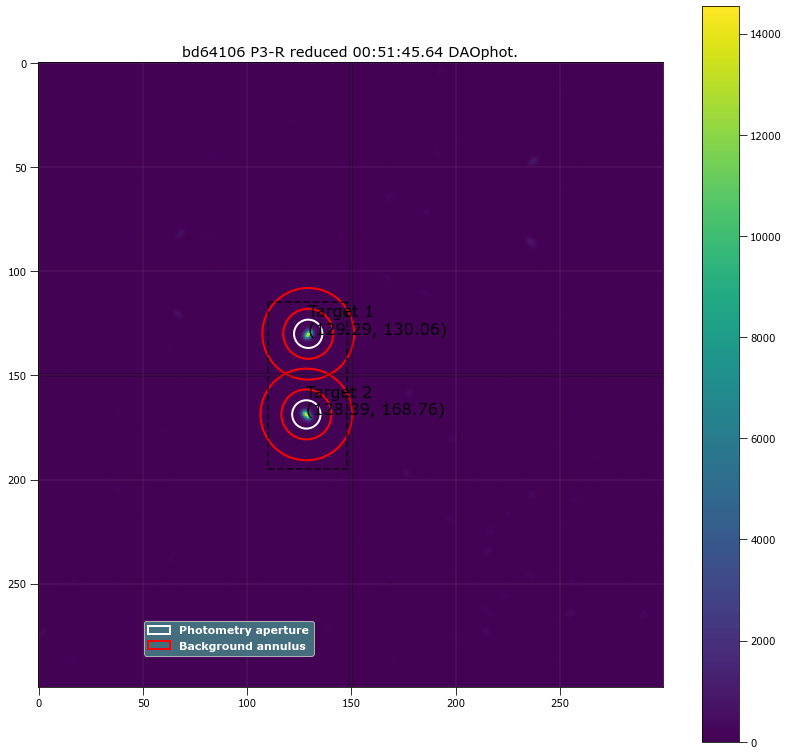

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 129.28688 130.06249 ...          3583.7917      82021.801          255.02671
  2 128.39496 168.75989 ...          3629.0814      80790.758          250.38324

 Aperture are: 145.31069737480098 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 129.28688 130.06249 ...                 3549.0977             171035.76
  2 128.39496 168.75989 ...                 3595.0191              179523.1

Write this out the excel
40 00:51:45.64 P3-R 10.0 6.801016949152542 129.28687566405839 130.06248911787617 171035.76497753058 3549.097709942658 1

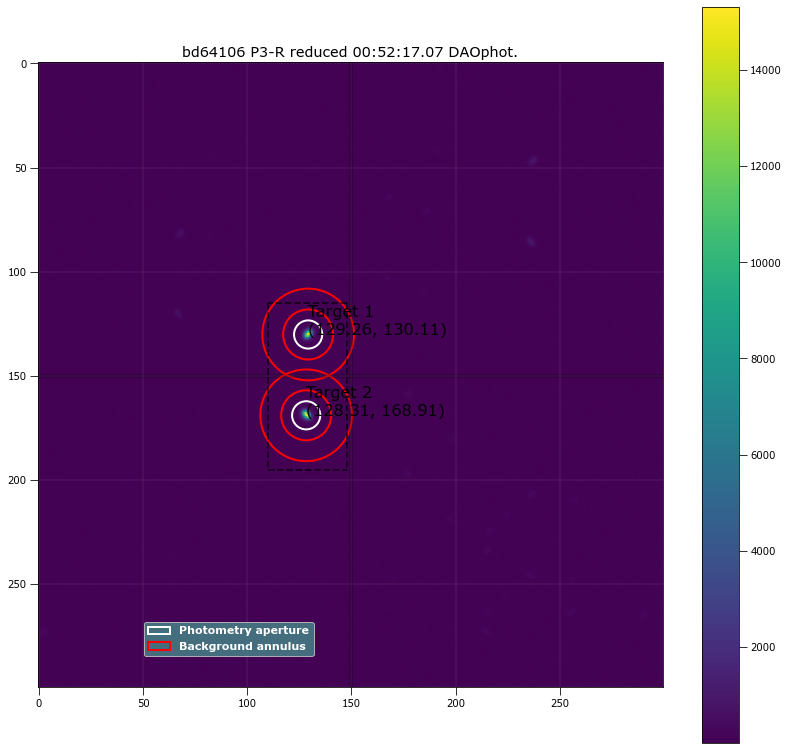

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 129.25542 130.11299 ...          3673.6058      81063.797          252.27151
  2  128.3145 168.90809 ...          3787.7974      78741.259          244.10746

 Aperture are: 143.6424448007044 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 129.25542 130.11299 ...                 3639.6806             174771.92
  2  128.3145 168.90809 ...                 3754.9702             183023.98

Write this out the excel
41 00:52:17.07 P3-R 10.0 6.761864406779661 129.25541726104117 130.11298673517578 174771.921178394 3639.680595065558 128.

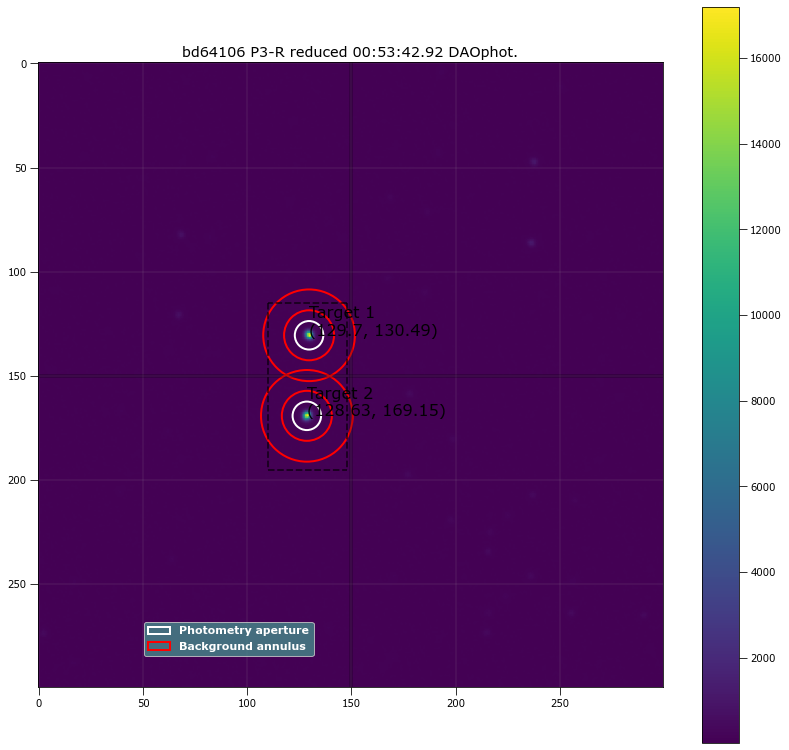

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 129.70372 130.49399 ...           3901.461       78479.84           244.3009
  2 128.63225   169.155 ...          3954.2043      76887.633          238.49833

 Aperture are: 146.98858157921 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 129.70372 130.49399 ...                 3867.8424             180715.54
  2 128.63225   169.155 ...                 3921.3842             189910.84

Write this out the excel
42 00:53:42.92 P3-R 10.0 6.840169491525423 129.70372109300624 130.49399295563953 180715.53717307406 3867.8423950995852 128

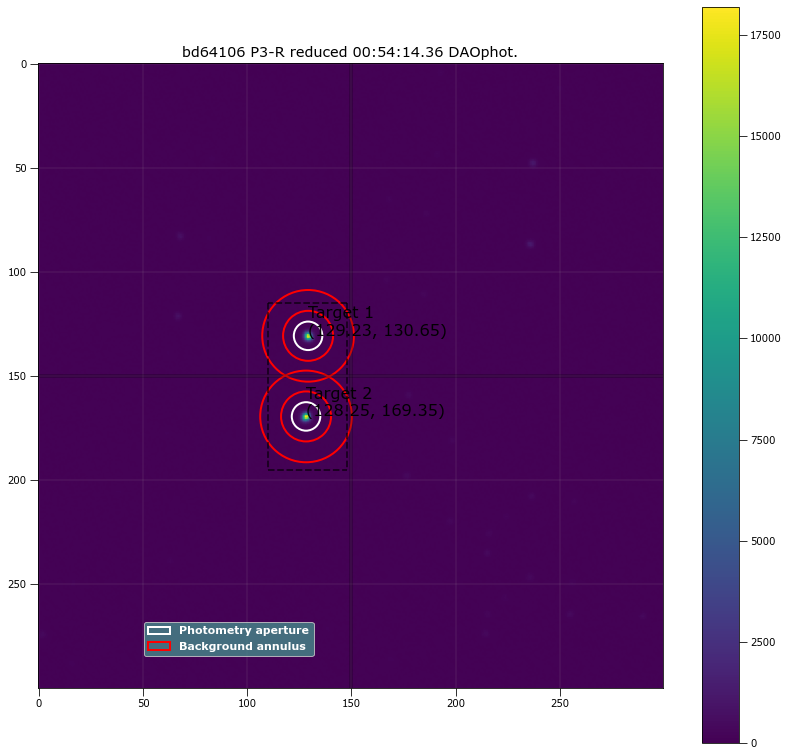

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1  129.2288 130.65471 ...          4081.6437      77212.169          240.76432
  2 128.25219 169.34716 ...          4248.8356      74926.376          232.46564

 Aperture are: 146.98858157921 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1  129.2288 130.65471 ...                 4048.5117             184423.05
  2 128.25219 169.34716 ...                 4216.8456             193552.62

Write this out the excel
43 00:54:14.36 P3-R 10.0 6.840169491525423 129.22879992364653 130.65470992972456 184423.0540437524 4048.511720945617 128.2

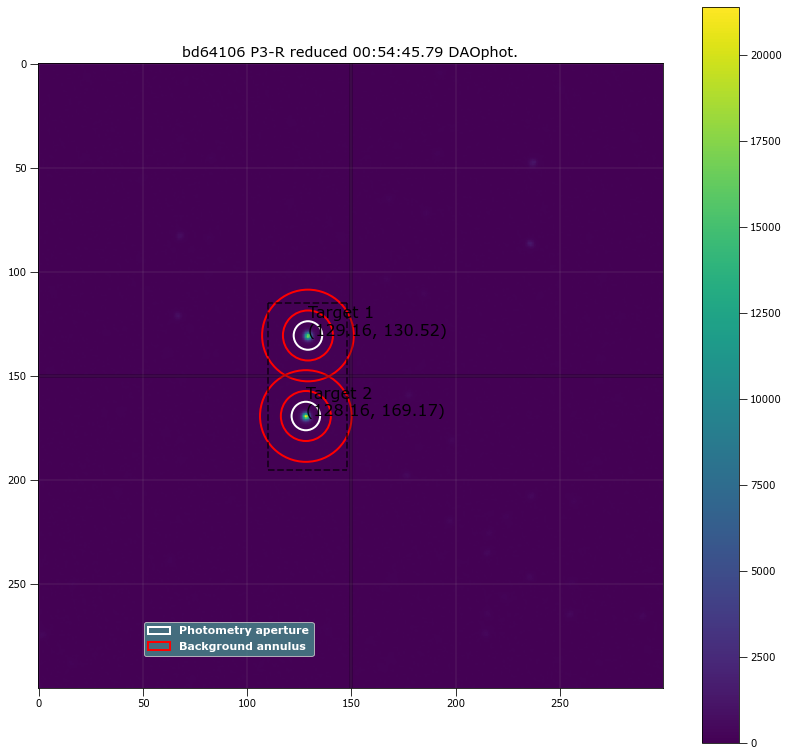

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 129.15916 130.51997 ...          4133.9948      75395.706          235.54035
  2 128.15817 169.17328 ...          4482.0914      74197.538          230.33179

 Aperture are: 146.98858157921 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 129.15916 130.51997 ...                 4101.5817             188956.47
  2 128.15817 169.17328 ...                 4450.3951             198180.34

Write this out the excel
44 00:54:45.79 P3-R 10.0 6.840169491525423 129.15916312429857 130.51997227256064 188956.47226035627 4101.581723461438 128.

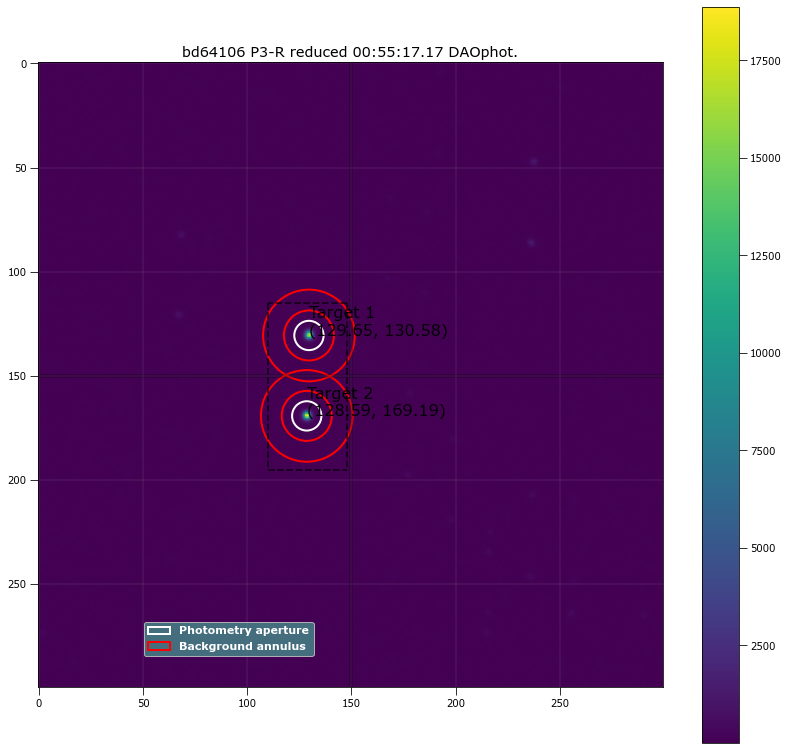

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 129.64718 130.58202 ...          4019.7979      75961.751          237.32233
  2 128.59101 169.18802 ...           4270.951      74856.738          232.38464

 Aperture are: 155.52247705594192 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 129.64718 130.58202 ...                 3985.2436             187839.96
  2 128.59101 169.18802 ...                 4237.1155              197461.9

Write this out the excel
45 00:55:17.17 P3-R 10.0 7.03593220338983 129.64717836921324 130.58201853556733 187839.96196543513 3985.2435659756807 1

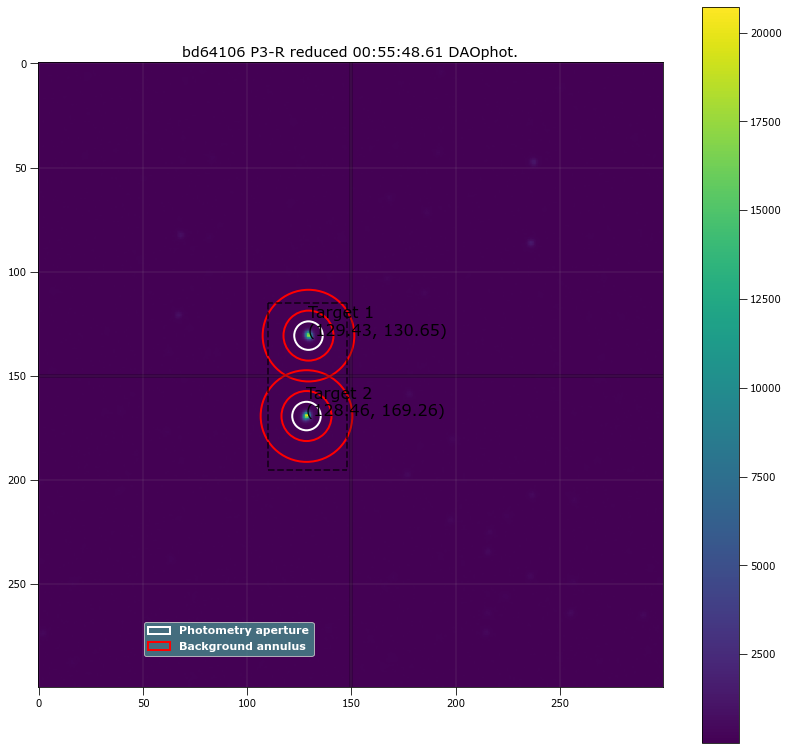

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 129.42646 130.65313 ...          4210.4782       75666.07          236.13707
  2 128.46321 169.25946 ...          4482.4751      74113.188          230.31162

 Aperture are: 146.98858157921 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 129.42646 130.65313 ...                  4177.983             187884.48
  2 128.46321 169.25946 ...                 4450.7816             197872.85

Write this out the excel
46 00:55:48.61 P3-R 10.0 6.840169491525423 129.42646239902098 130.65313211102753 187884.4763950163 4177.983033486846 128.4

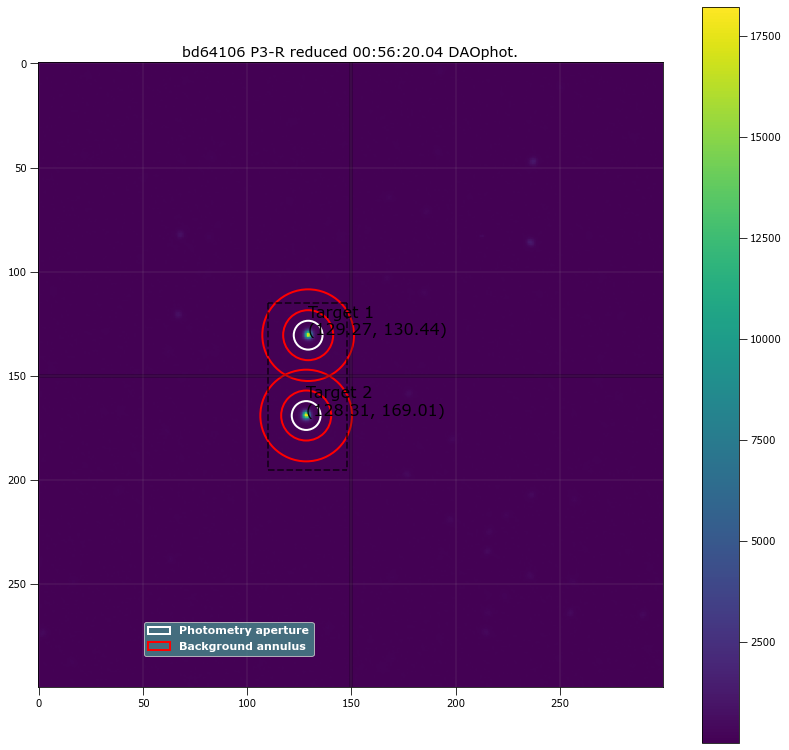

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 129.26798 130.44242 ...            4166.42      75043.448          234.27192
  2 128.31287 169.01195 ...           4313.499      72870.483          226.46698

 Aperture are: 150.37324487896544 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 129.26798 130.44242 ...                 4133.4392             190721.52
  2 128.31287 169.01195 ...                 4281.6169             200833.05

Write this out the excel
47 00:56:20.04 P3-R 10.0 6.918474576271186 129.26797540467905 130.4424195619783 190721.52127940717 4133.439172389196 12

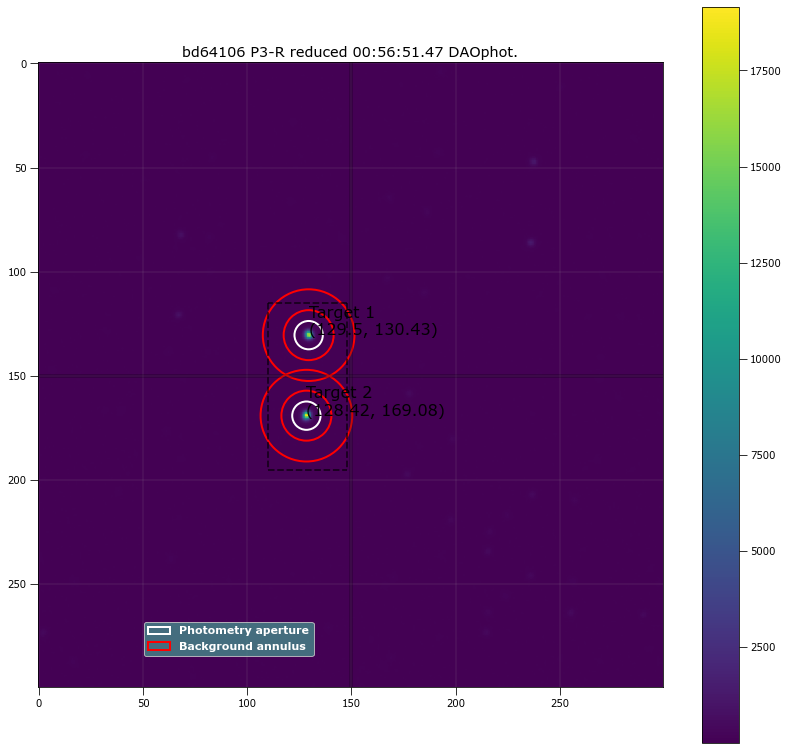

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 129.50257 130.42613 ...          4145.4479      73638.307          230.18393
  2 128.42001 169.07532 ...          4382.2534      72404.672          224.88548

 Aperture are: 145.31069737480098 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 129.50257 130.42613 ...                 4114.1336             193126.68
  2 128.42001 169.07532 ...                 4351.6599             203197.18

Write this out the excel
48 00:56:51.47 P3-R 10.0 6.801016949152542 129.50256844850995 130.4261317947724 193126.68236952313 4114.133550740543 12

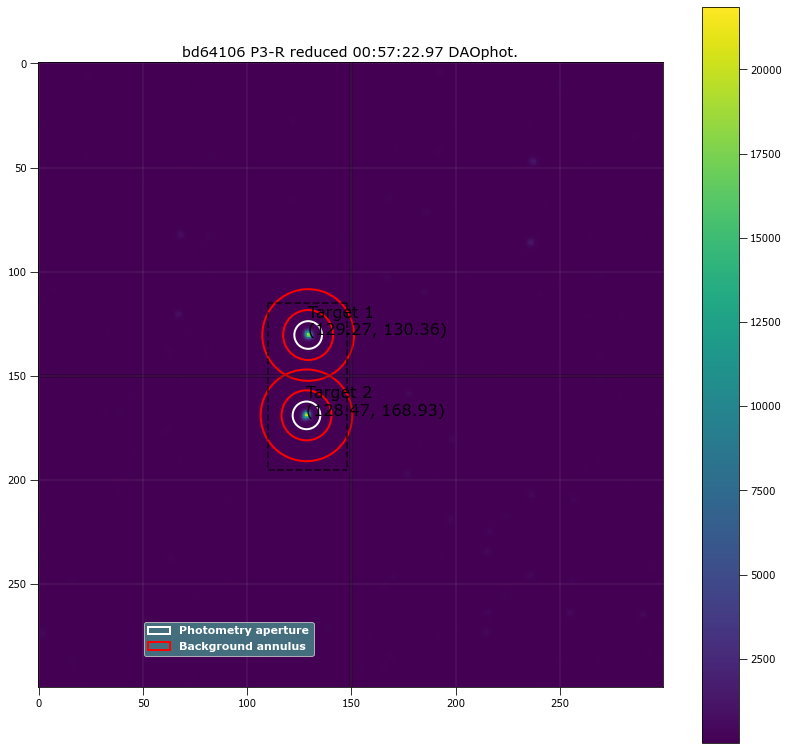

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 129.27422 130.36166 ...          4427.6387      73250.795          229.09269
  2 128.47136 168.93354 ...          4655.8207      71295.052          221.87078

 Aperture are: 138.69547686028938 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 129.27422 130.36166 ...                 4397.8916             194377.21
  2 128.47136 168.93354 ...                 4627.0113             203746.07

Write this out the excel
49 00:57:22.97 P3-R 10.0 6.644406779661017 129.27422212718074 130.36165518573054 194377.21267820822 4397.891551781352 1

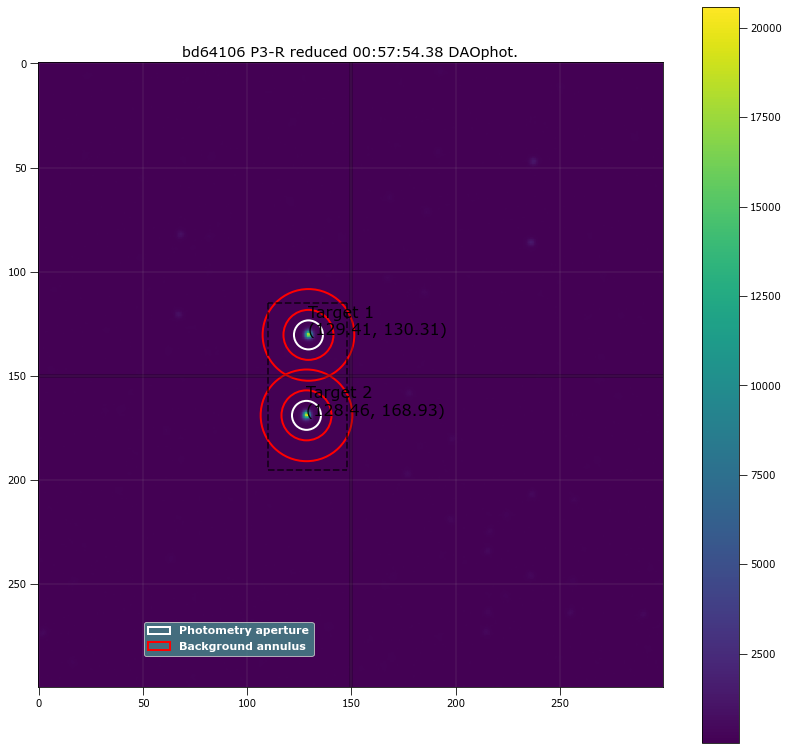

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1  129.4116 130.30745 ...          4335.9085      72933.309          228.03797
  2 128.46347 168.92867 ...          4545.9171      71257.856          221.64131

 Aperture are: 152.0800239743118 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1  129.4116 130.30745 ...                 4303.4409                197199
  2 128.46347 168.92867 ...                 4514.3602              206187.5

Write this out the excel
50 00:57:54.38 P3-R 10.0 6.9576271186440675 129.4116022184533 130.30744529698308 197199.0034588037 4303.440878298064 128

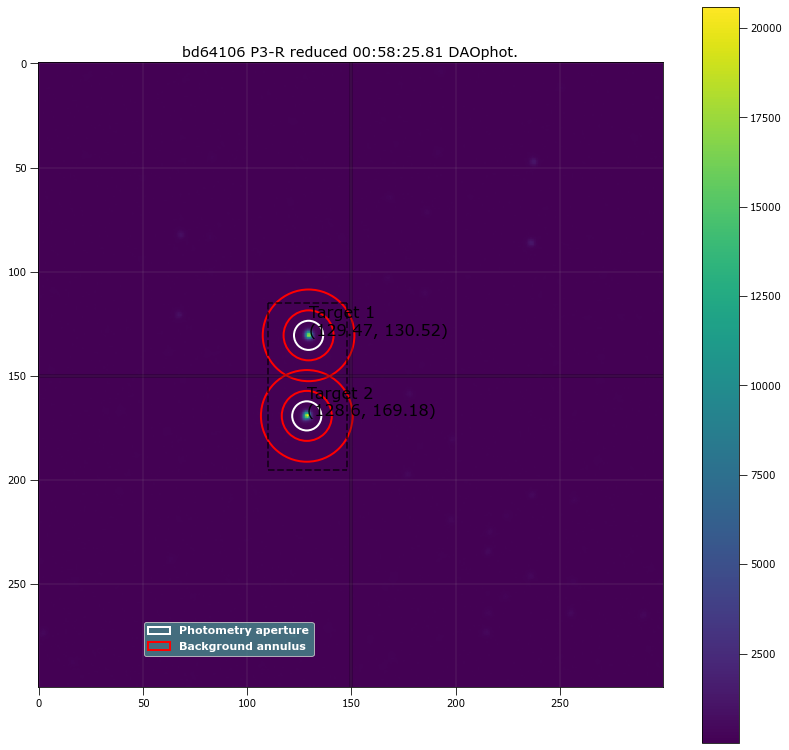

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 129.46567 130.52136 ...           4251.843      73668.589          230.02656
  2 128.60164 169.18359 ...          4476.2718      71716.312          222.88458

 Aperture are: 153.79643469997063 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 129.46567 130.52136 ...                 4218.7226             195701.89
  2 128.60164 169.18359 ...                 4444.1797             205954.48

Write this out the excel
51 00:58:25.81 P3-R 10.0 6.996779661016949 129.46567337332073 130.5213629364458 195701.89437231564 4218.722643593681 12

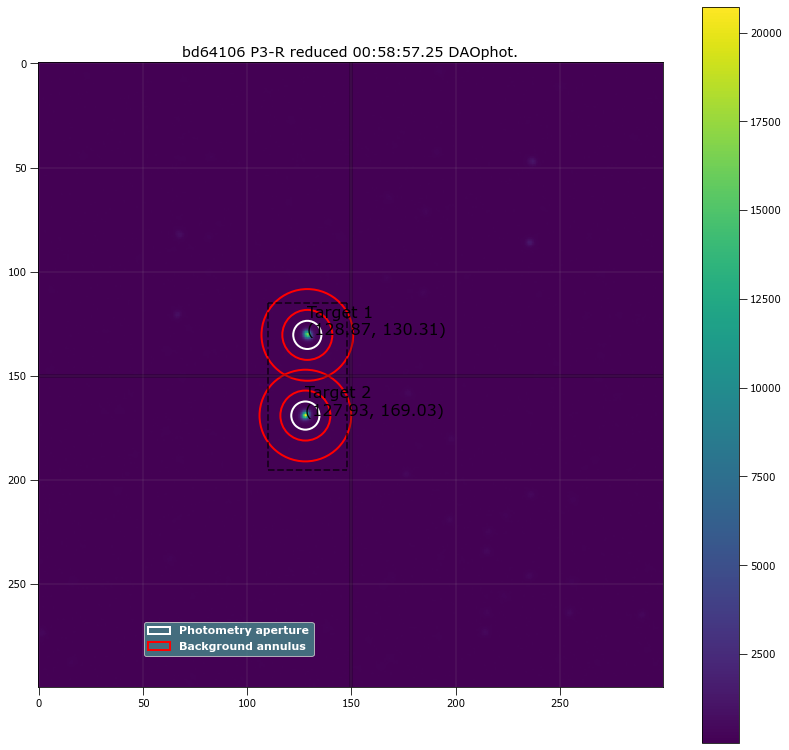

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 128.86731 130.31277 ...          4110.8699      73230.015          228.75686
  2 127.92659 169.02665 ...          4448.9025      71255.131          221.57868

 Aperture are: 143.6424448007044 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 128.86731 130.31277 ...                  4080.107             198767.35
  2 127.92659 169.02665 ...                 4419.1049              208009.6

Write this out the excel
52 00:58:57.25 P3-R 10.0 6.761864406779661 128.86730623191156 130.31277003456032 198767.35327582658 4080.106961192634 12

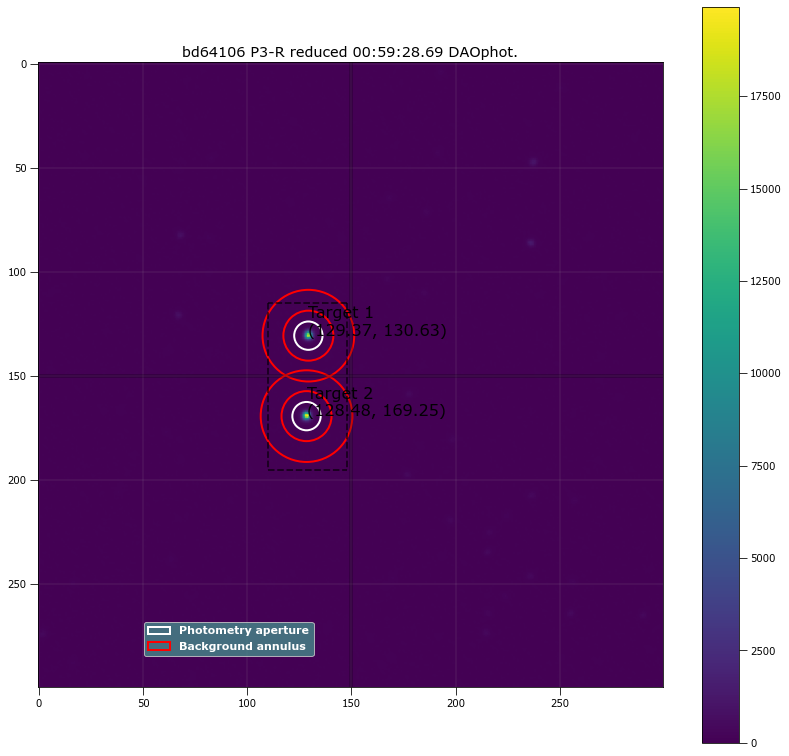

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 129.36898 130.63138 ...          4260.5357      73186.759          228.66085
  2 128.47912 169.25456 ...          4570.2752      70927.369          220.65545

 Aperture are: 145.31069737480098 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 129.36898 130.63138 ...                 4229.4285             198563.87
  2 128.47912 169.25456 ...                 4540.2571             208037.79

Write this out the excel
53 00:59:28.69 P3-R 10.0 6.801016949152542 129.36897763946084 130.6313757987033 198563.86552794353 4229.4285434560015 1

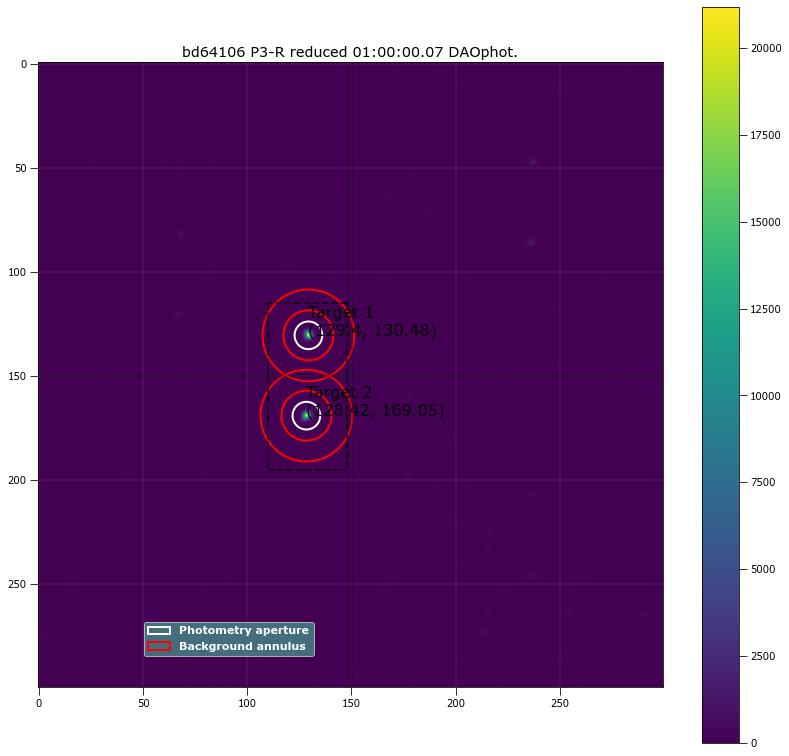

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 129.39803 130.48247 ...          4446.8733      72505.161          226.58718
  2 128.42433  169.0469 ...          4554.7793      71036.005          220.68181

 Aperture are: 138.69547686028938 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 129.39803 130.48247 ...                 4417.4516             197406.28
  2 128.42433  169.0469 ...                 4526.1243             206464.53

Write this out the excel
54 01:00:00.07 P3-R 10.0 6.644406779661017 129.39803462204083 130.48246723278265 197406.27530862807 4417.451575848325 1

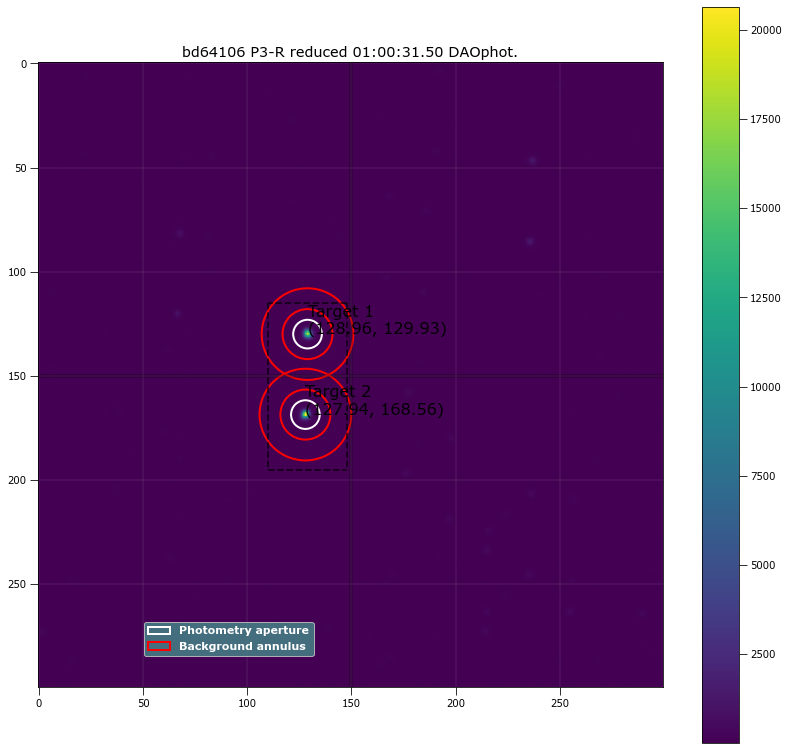

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 128.96041 129.93361 ...          4285.2284      73288.921          229.25068
  2 127.93774 168.56263 ...          4653.2537      71404.193           221.7969

 Aperture are: 148.6760974139315 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 128.96041 129.93361 ...                 4253.3187             199205.43
  2 127.93774 168.56263 ...                 4622.3815             208545.46

Write this out the excel
55 01:00:31.50 P3-R 10.0 6.879322033898305 128.96040641826622 129.93360550003501 199205.43128174264 4253.318679798183 12

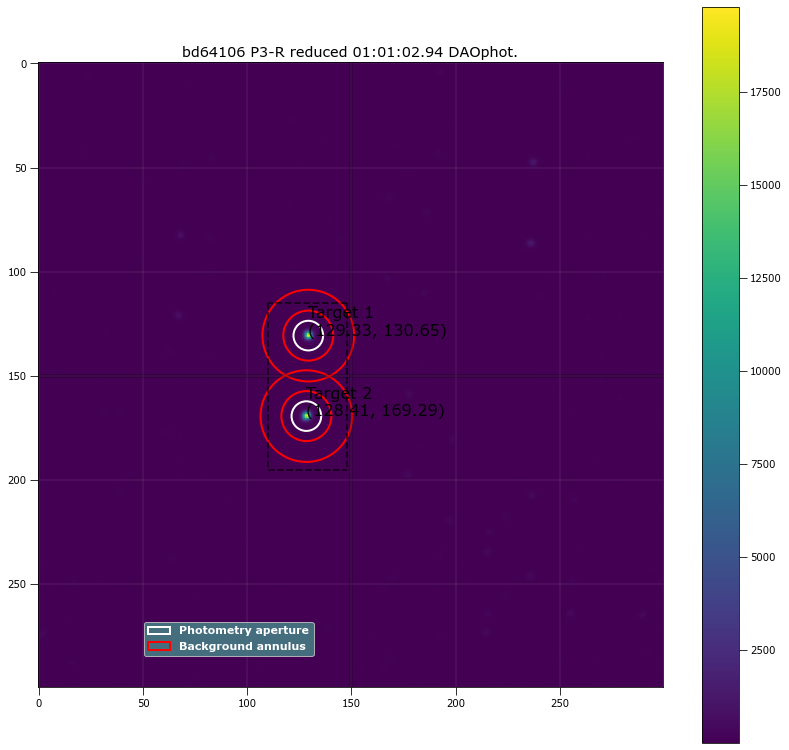

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 129.33007 130.65094 ...          4443.4033      72121.189          225.86626
  2 128.41284 169.28975 ...          4555.7413      69890.322          217.65858

 Aperture are: 159.00345665882185 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 129.33007 130.65094 ...                 4409.7809              199211.5
  2 128.41284 169.28975 ...                 4523.3406             208819.37

Write this out the excel
56 01:01:02.94 P3-R 10.0 7.114237288135593 129.33006928537407 130.6509416680981 199211.50463560934 4409.780875243425 12

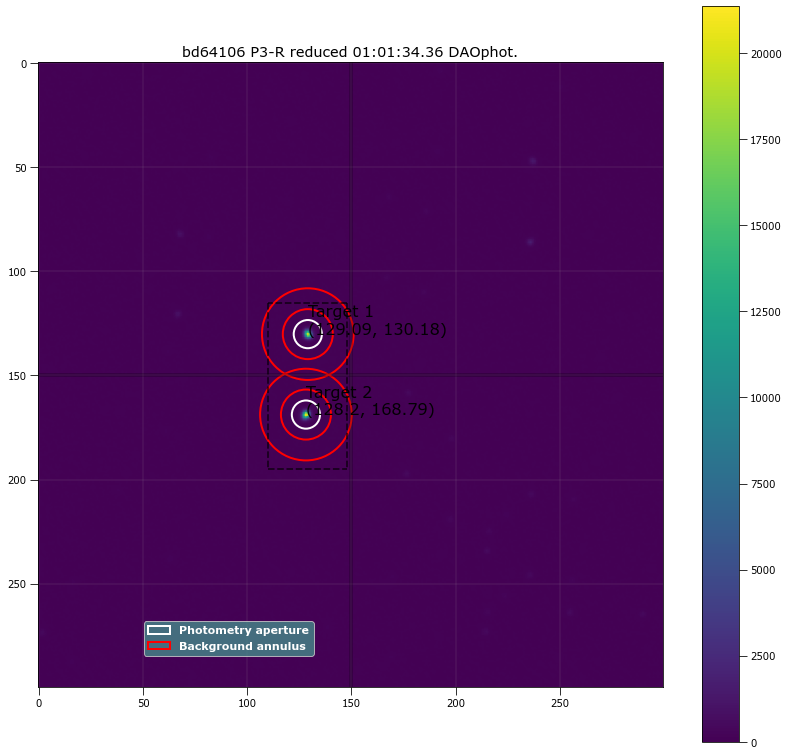

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 129.09463 130.17949 ...          4467.8175      72790.982           227.7543
  2 128.19712 168.79496 ...          4747.9292      70297.076          218.54796

 Aperture are: 143.6424448007044 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 129.09463 130.17949 ...                 4437.1894             197631.02
  2 128.19712 168.79496 ...                 4718.5391             207626.91

Write this out the excel
57 01:01:34.36 P3-R 10.0 6.761864406779661 129.0946255350761 130.1794935414135 197631.02039434656 4437.189404074281 128.

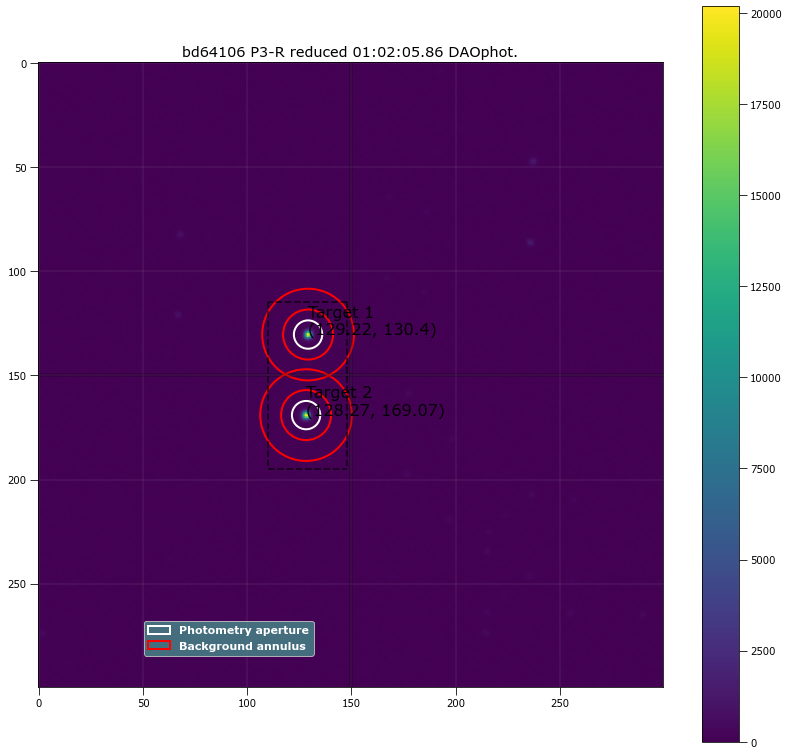

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 129.21841 130.40246 ...          4502.8054      73546.694          230.02499
  2 128.27407 169.07016 ...          4669.7597      71476.991          222.16504

 Aperture are: 145.31069737480098 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 129.21841 130.40246 ...                 4471.5126              196560.4
  2 128.27407 169.07016 ...                 4639.5362             206263.83

Write this out the excel
58 01:02:05.86 P3-R 10.0 6.801016949152542 129.21840612993054 130.40245620621306 196560.39581574016 4471.512624026718 1

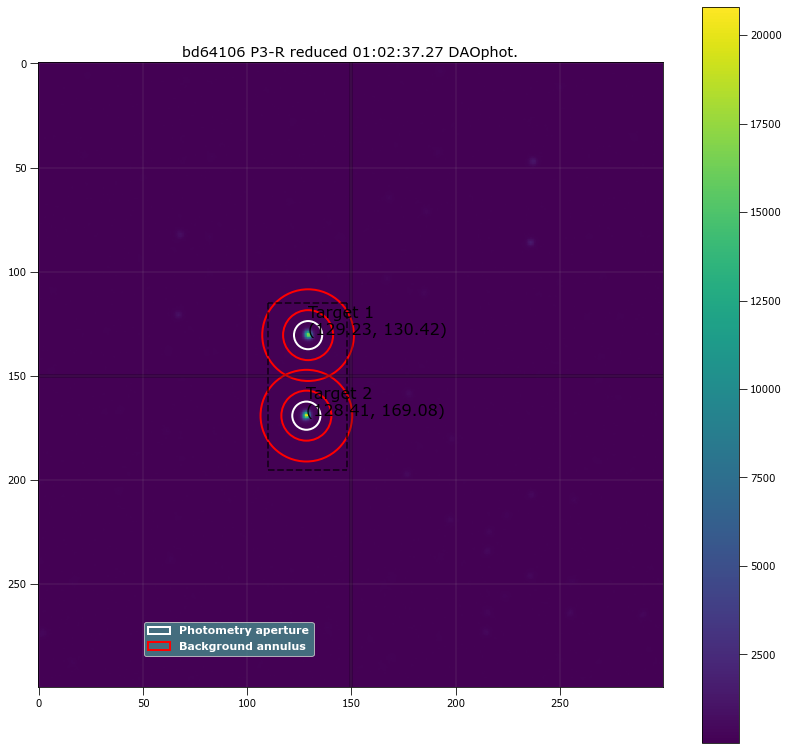

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1  129.2314 130.42186 ...           4246.895      72286.312          226.20616
  2 128.40655 169.07695 ...          4587.4015       70337.59          218.81234

 Aperture are: 143.6424448007044 Annulus Area: 1068.1415022205297 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1  129.2314 130.42186 ...                 4216.4751             194980.73
  2 128.40655 169.07695 ...                 4557.9758             204685.83

Write this out the excel
59 01:02:37.27 P3-R 10.0 6.761864406779661 129.2313980924626 130.4218587800184 194980.72911965955 4216.475104297283 128.

In [58]:
#If its too low the threshold is nan. and thats one of the reason it throws a wobbly
#You have to do a manual Fit before you do a physical fit.
#Call it "The split pair, call it the extraordinary ray."
#The pipe!
#we expect 4 targets.. haha sure
#37 doesnt work
#Here is a work around. Incorporate the peak finder into the pipeline and tell the process such that if DAO cannot find the 
#targets, use the peak find coordinates. I suspect the problem is the FWHM.

#P1-R Filter
print("P3-R Filter")

res_apt_sum_list = []

start = 30
end = 60

filename = astropy.io.fits.open(pol_std[start])[0].header['OBJECT']+"_"+astropy.io.fits.open(pol_std[start])[0].header['FILTER']

workbook = xlsxwriter.Workbook('./stats/'+MJD+"_"+ filename+str(start)+"-" +str(end)  +'.xlsx')
worksheet = workbook.add_worksheet()
worksheet.write('A1', 'int')
worksheet.write('B1', 'time obs')
worksheet.write('C1', 'filter')
worksheet.write('D1', 'exptime')
worksheet.write('E1', 'aperture radius')
worksheet.write('F1', 'pol_std 1 x center')
worksheet.write('G1', 'pol_std 1 y center')
worksheet.write('H1', 'pol_std 1 counts')
worksheet.write('I1', 'pol_std 1 error')
worksheet.write('J1', 'pol_std 2 x center')
worksheet.write('K1', 'pol_std 2 y center')
worksheet.write('L1', 'pol_std 2 counts')
worksheet.write('M1', 'pol_std 2 error')
worksheet.write('N1', 'q')
worksheet.write('O1', 'q error')
worksheet.write('P1', 'u')
worksheet.write('Q1', 'u error')
worksheet.write('R1', 'PD')
worksheet.write('S1', 'PD error')
worksheet.write('T1', 'PA')
worksheet.write('U1', 'PA error')

row = 1
column = 0
search_off = 150
siegma_search = 3
search_bracket =  [35, 45, 40, -2]

for k in range(start, end ):
    reduced_obj = funcs_calib_and_plot.plot_double_raw_v_reduced(astropy.io.fits.open(pol_std[k]),
                                        [512, 512, 512, 512], 
                                        (m_biast, m_dark, p_3_m_flat), 
                                        False, True, False)

    trial_radii = np.linspace(5, 9.62, num=60)
    pol_std_a = []
    pol_std_b = []
    for radii in trial_radii:
        #Find the position
        DAO_positions = funcs_star_finder.dao_star_finder(reduced_obj, search_bracket, siegma_search, 
                                                          960, search_off, radii, 12 , 22, False, False)
        
        if (len(DAO_positions) != 2):
            x_targ, y_targ, peak_targ  = funcs_polarimetry.source_peak_finder_pol_std(reduced_obj, 4, search_bracket, 950, False, False) #what do I return from this?
            apt_pos = funcs_star_finder.plot_spotted(reduced_obj, search_off, search_bracket , x_targ, y_targ, peak_targ, False, False)
            DAO_positions = funcs_star_finder.peak_to_DAO(apt_pos)        
        
        phot_tab = funcs_apt_phot.apt_phot_local_bkg_sub(reduced_obj, search_off, search_bracket, DAO_positions, radii, 12 , 22, False, False)
        pol_std_a.append(phot_tab['residual_aperture_sum'][0])
        pol_std_b.append(phot_tab['residual_aperture_sum'][1])

    combine_pol_std = [pol_std_a, pol_std_b]
    
    good_radii=funcs_apt_phot.solve_apt(combine_pol_std, trial_radii, False)

    print("Aperture radius for", reduced_obj[0].header['TIME-OBS'],"is", good_radii)
    phot_tab = funcs_apt_phot.apt_phot_local_bkg_sub(reduced_obj, search_off, search_bracket, DAO_positions,good_radii, 12 , 22, True, False)

    res_apt_sum_list.append(phot_tab['residual_aperture_sum'])
    
    print("\nWrite this out the excel")
    print(k, 
          astropy.io.fits.open(pol_std[k])[0].header['TIME-OBS'],
          astropy.io.fits.open(pol_std[k])[0].header['FILTER'],
          astropy.io.fits.open(pol_std[k])[0].header['EXPTIME'],
          good_radii,          
          phot_tab['xcenter'][0].value, phot_tab['ycenter'][0].value,
          phot_tab['residual_aperture_sum'][0], phot_tab['residual_aperture_sum_err'][0],
          phot_tab['xcenter'][1].value, phot_tab['ycenter'][1].value,
          phot_tab['residual_aperture_sum'][1], phot_tab['residual_aperture_sum_err'][1],"\n")
    
    write_this = [k, 
          astropy.io.fits.open(pol_std[k])[0].header['TIME-OBS'],
          astropy.io.fits.open(pol_std[k])[0].header['FILTER'],
          astropy.io.fits.open(pol_std[k])[0].header['EXPTIME'],
          good_radii,
          phot_tab['xcenter'][0].value, phot_tab['ycenter'][0].value,
          phot_tab['residual_aperture_sum'][0], phot_tab['residual_aperture_sum_err'][0],
          phot_tab['xcenter'][1].value, phot_tab['ycenter'][1].value,
          phot_tab['residual_aperture_sum'][1], phot_tab['residual_aperture_sum_err'][1]] #,

    for item in write_this :
        worksheet.write(row, column, item)
        column += 1
        
    column = 0
    row += 1
    
workbook.close()

pol_std_1 = []
pol_std_2 = []

for things in res_apt_sum_list:
    pol_std_1.append(things[0])
    pol_std_2.append(things[1])

In [16]:
#Now I am seeing a case where with the threshold lowered, long compute time I am picking up unwanted background sources
#I'm looking at the example from P1-R
#Target_1
#1 and 2 are posed to be the ordinary ray. One and 2 are post to be the brightest always.